# Tutorial 7: Index Tracking/Replicating Portfolios

## 1. Downloading the data:

| 티커 | 설명 | 
|------|------|
| **JCI** | Johnson Controls International plc: 건물 제품 및 시스템을 설계, 제조, 설치 및 서비스하는 글로벌 기업. 주로 상업용 HVAC 시스템, 통합 전자 보안 시스템 및 화재 감지 및 진압 시스템을 제공합니다. |
| **TGT** | Target Corporation: 미국의 대형 소매 체인으로, 다양한 소비자 제품을 판매하며 온라인과 오프라인 매장을 운영합니다. |
| **CMCSA** | Comcast Corporation: 미국의 미디어 및 기술 회사로, 케이블 TV, 인터넷, 전화 서비스 및 NBCUniversal을 통해 콘텐츠 제작 및 배급을 담당합니다. |
| **CPB** | Campbell Soup Company: 미국의 식품 회사로, 수프, 스낵, 음료 및 기타 식품 제품을 제조 및 판매합니다. |
| **MO** | Altria Group, Inc.: 주로 담배, 시가, 와인 등의 제품을 제조 및 판매하는 회사입니다. |
| **APA** | APA Corporation: 미국의 석유 및 천연가스 탐사 및 생산 회사입니다. |
| **MMC** | Marsh & McLennan Companies, Inc.: 글로벌 전문 서비스 회사로, 리스크 관리, 보험 중개, 재보험 중개, 인재 관리 및 투자 컨설팅 서비스를 제공합니다. |
| **JPM** | JPMorgan Chase & Co.: 글로벌 금융 서비스 회사로, 은행, 투자, 자산 관리 및 기타 금융 서비스를 제공합니다. |
| **ZION** | Zions Bancorporation: 미국 서부 지역에서 상업 은행 서비스를 제공하는 금융 기관입니다. |
| **PSA** | Public Storage: 미국의 셀프 스토리지 시설을 운영하는 회사입니다. |
| **BAX** | Baxter International Inc.: 글로벌 의료 제품 회사로, 병원 및 의료 제공자를 위한 다양한 치료 솔루션을 제공합니다. |
| **BMY** | Bristol-Myers Squibb Company: 글로벌 제약 회사로, 암, 심혈관 질환, 면역학 및 섬유화 치료제를 개발 및 판매합니다. |
| **LUV** | Southwest Airlines Co.: 미국의 저가 항공사로, 국내외 항공 서비스를 제공합니다. |
| **PCAR** | PACCAR Inc.: 중형 및 대형 트럭을 설계, 제조 및 판매하는 글로벌 기술 회사입니다. |
| **TXT** | Textron Inc.: 항공우주, 방위, 산업 및 금융 사업을 운영하는 다국적 기업입니다. |
| **TMO** | Thermo Fisher Scientific Inc.: 과학 연구, 분석 기기, 진단 및 생명 과학 분야의 제품 및 서비스를 제공하는 회사입니다. |
| **DE** | Deere & Company: 농업, 건설 및 임업 장비를 설계, 제조 및 판매하는 글로벌 회사입니다. |
| **MSFT** | Microsoft Corporation: 소프트웨어, 하드웨어, 서비스 및 솔루션을 제공하는 글로벌 기술 회사입니다. |
| **HPQ** | HP Inc.: 개인용 컴퓨터, 프린터 및 관련 액세서리를 제조 및 판매하는 글로벌 기술 회사입니다. |
| **SEE** | Sealed Air Corporation: 포장 제품 및 시스템을 설계, 제조 및 판매하는 회사입니다. |
| **VZ** | Verizon Communications Inc.: 무선 및 유선 통신 서비스를 제공하는 미국의 통신 회사입니다. |
| **CNP** | CenterPoint Energy, Inc.: 미국의 전기 및 천연가스 유틸리티 회사입니다. |
| **NI** | NiSource Inc.: 전기 및 천연가스를 제공하는 미국의 유틸리티 회사입니다. |
| **T** | AT&T Inc.: 통신 및 디지털 엔터테인먼트 서비스를 제공하는 글로벌 회사입니다. |
| **BA** | The Boeing Company: 항공기, 로터크래프트, 로켓, 위성 및 미사일을 설계, 제조 및 판매하는 글로벌 항공우주 회사입니다. |


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

market_index = ['^GSPC'] # S&P 500 지수

all_assets = assets + market_index
all_assets.sort()

# Downloading data
data = yf.download(all_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets

[*********************100%%**********************]  26 of 26 completed


In [2]:
# Calculating returns

Y = data[all_assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0256%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3735%,-1.0857%,0.2012%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7652%,-3.0048%,-0.9035%,-2.9145%,-1.3115%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8855%,-4.6058%,-2.5394%,...,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%,-2.3700%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1098%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3838%,-0.1116%,-1.1386%,-0.9719%,-1.1254%,-1.0838%
2016-01-11,-4.3384%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0330%,...,0.0000%,0.9869%,-0.1451%,1.2224%,1.4570%,0.5366%,-0.4607%,0.5800%,-1.9919%,0.0853%


## 2. Estimating Mean Variance Portfolios with Turnover Constraints

turnover 제약 조건을 설정하여 포트폴리오 재조정 시 변경되는 자산 비중의 최대 한도를 설정합니다. Turnover는 포트폴리오 재조정 시 자산 비중의 변화량을 제한하는 데 사용됩니다. 이를 통해 거래 비용을 최소화하고 포트폴리오의 안정성을 유지할 수 있습니다.

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [3]:
import riskfolio as rp

# Building the portfolio object

port = rp.Portfolio(returns=Y[assets])
# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Create Turnover Constraints

port.allowTO = True # Allows to use Turnover Constraints
# 벤치마크 비중 대비 최대 5%의 절대 변화량을 허용하는 것을 의미합니다.
port.turnover = 0.05 # Maximum deviation in absolute value respect to benchmark weights
# By default benchweights is the equally weighted portfolio,
# if you want to use a different benchmark weights, you must
# specify a weights dataframe with assets names in columns
#port.benchweights = weights # Use a dataframe
# 기본적으로 벤치마크 비중은 동일 가중 포트폴리오입니다. 다른 벤치마크를 사용하려면 port.benchweights에 원하는 가중치를 설정할 수 있습니다.

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,9.0000%,9.0000%,0.0000%,1.6873%,9.0000%,0.0000%,7.6133%,0.0000%,0.0000%,...,9.0000%,0.0000%,0.0000%,0.0000%,0.6994%,9.0000%,9.0000%,0.0000%,9.0000%,0.0000%



### Turnover란?

Turnover는 포트폴리오 재조정 시 자산 비중의 변화량을 의미합니다. Turnover 제약 조건은 포트폴리오의 안정성을 유지하고 거래 비용을 최소화하기 위해 설정됩니다. 예를 들어, Turnover가 5%로 설정되면, 포트폴리오 재조정 시 각 자산의 비중이 벤치마크 비중 대비 5% 이상 변경될 수 없습니다. 이를 통해 과도한 거래로 인한 비용을 줄이고, 포트폴리오의 안정성을 유지할 수 있습니다.

### 요약

- **포트폴리오 객체 생성**: 주어진 자산의 수익률 데이터를 사용하여 포트폴리오 객체를 생성합니다.
- **자산 통계량 계산**: 역사적 데이터를 사용하여 기대 수익률과 공분산 행렬을 추정합니다.
- **Turnover 제약 조건 설정**: 포트폴리오 재조정 시 자산 비중의 변화량을 제한하여 거래 비용을 최소화하고 안정성을 유지합니다.
- **최적 포트폴리오 추정**: 설정된 모델과 리스크 측정 방법을 사용하여 최적의 포트폴리오 가중치를 계산합니다.
- **최적 포트폴리오 가중치 출력**: 계산된 최적 포트폴리오 가중치를 출력합니다.

### 2.2 Plotting portfolio composition

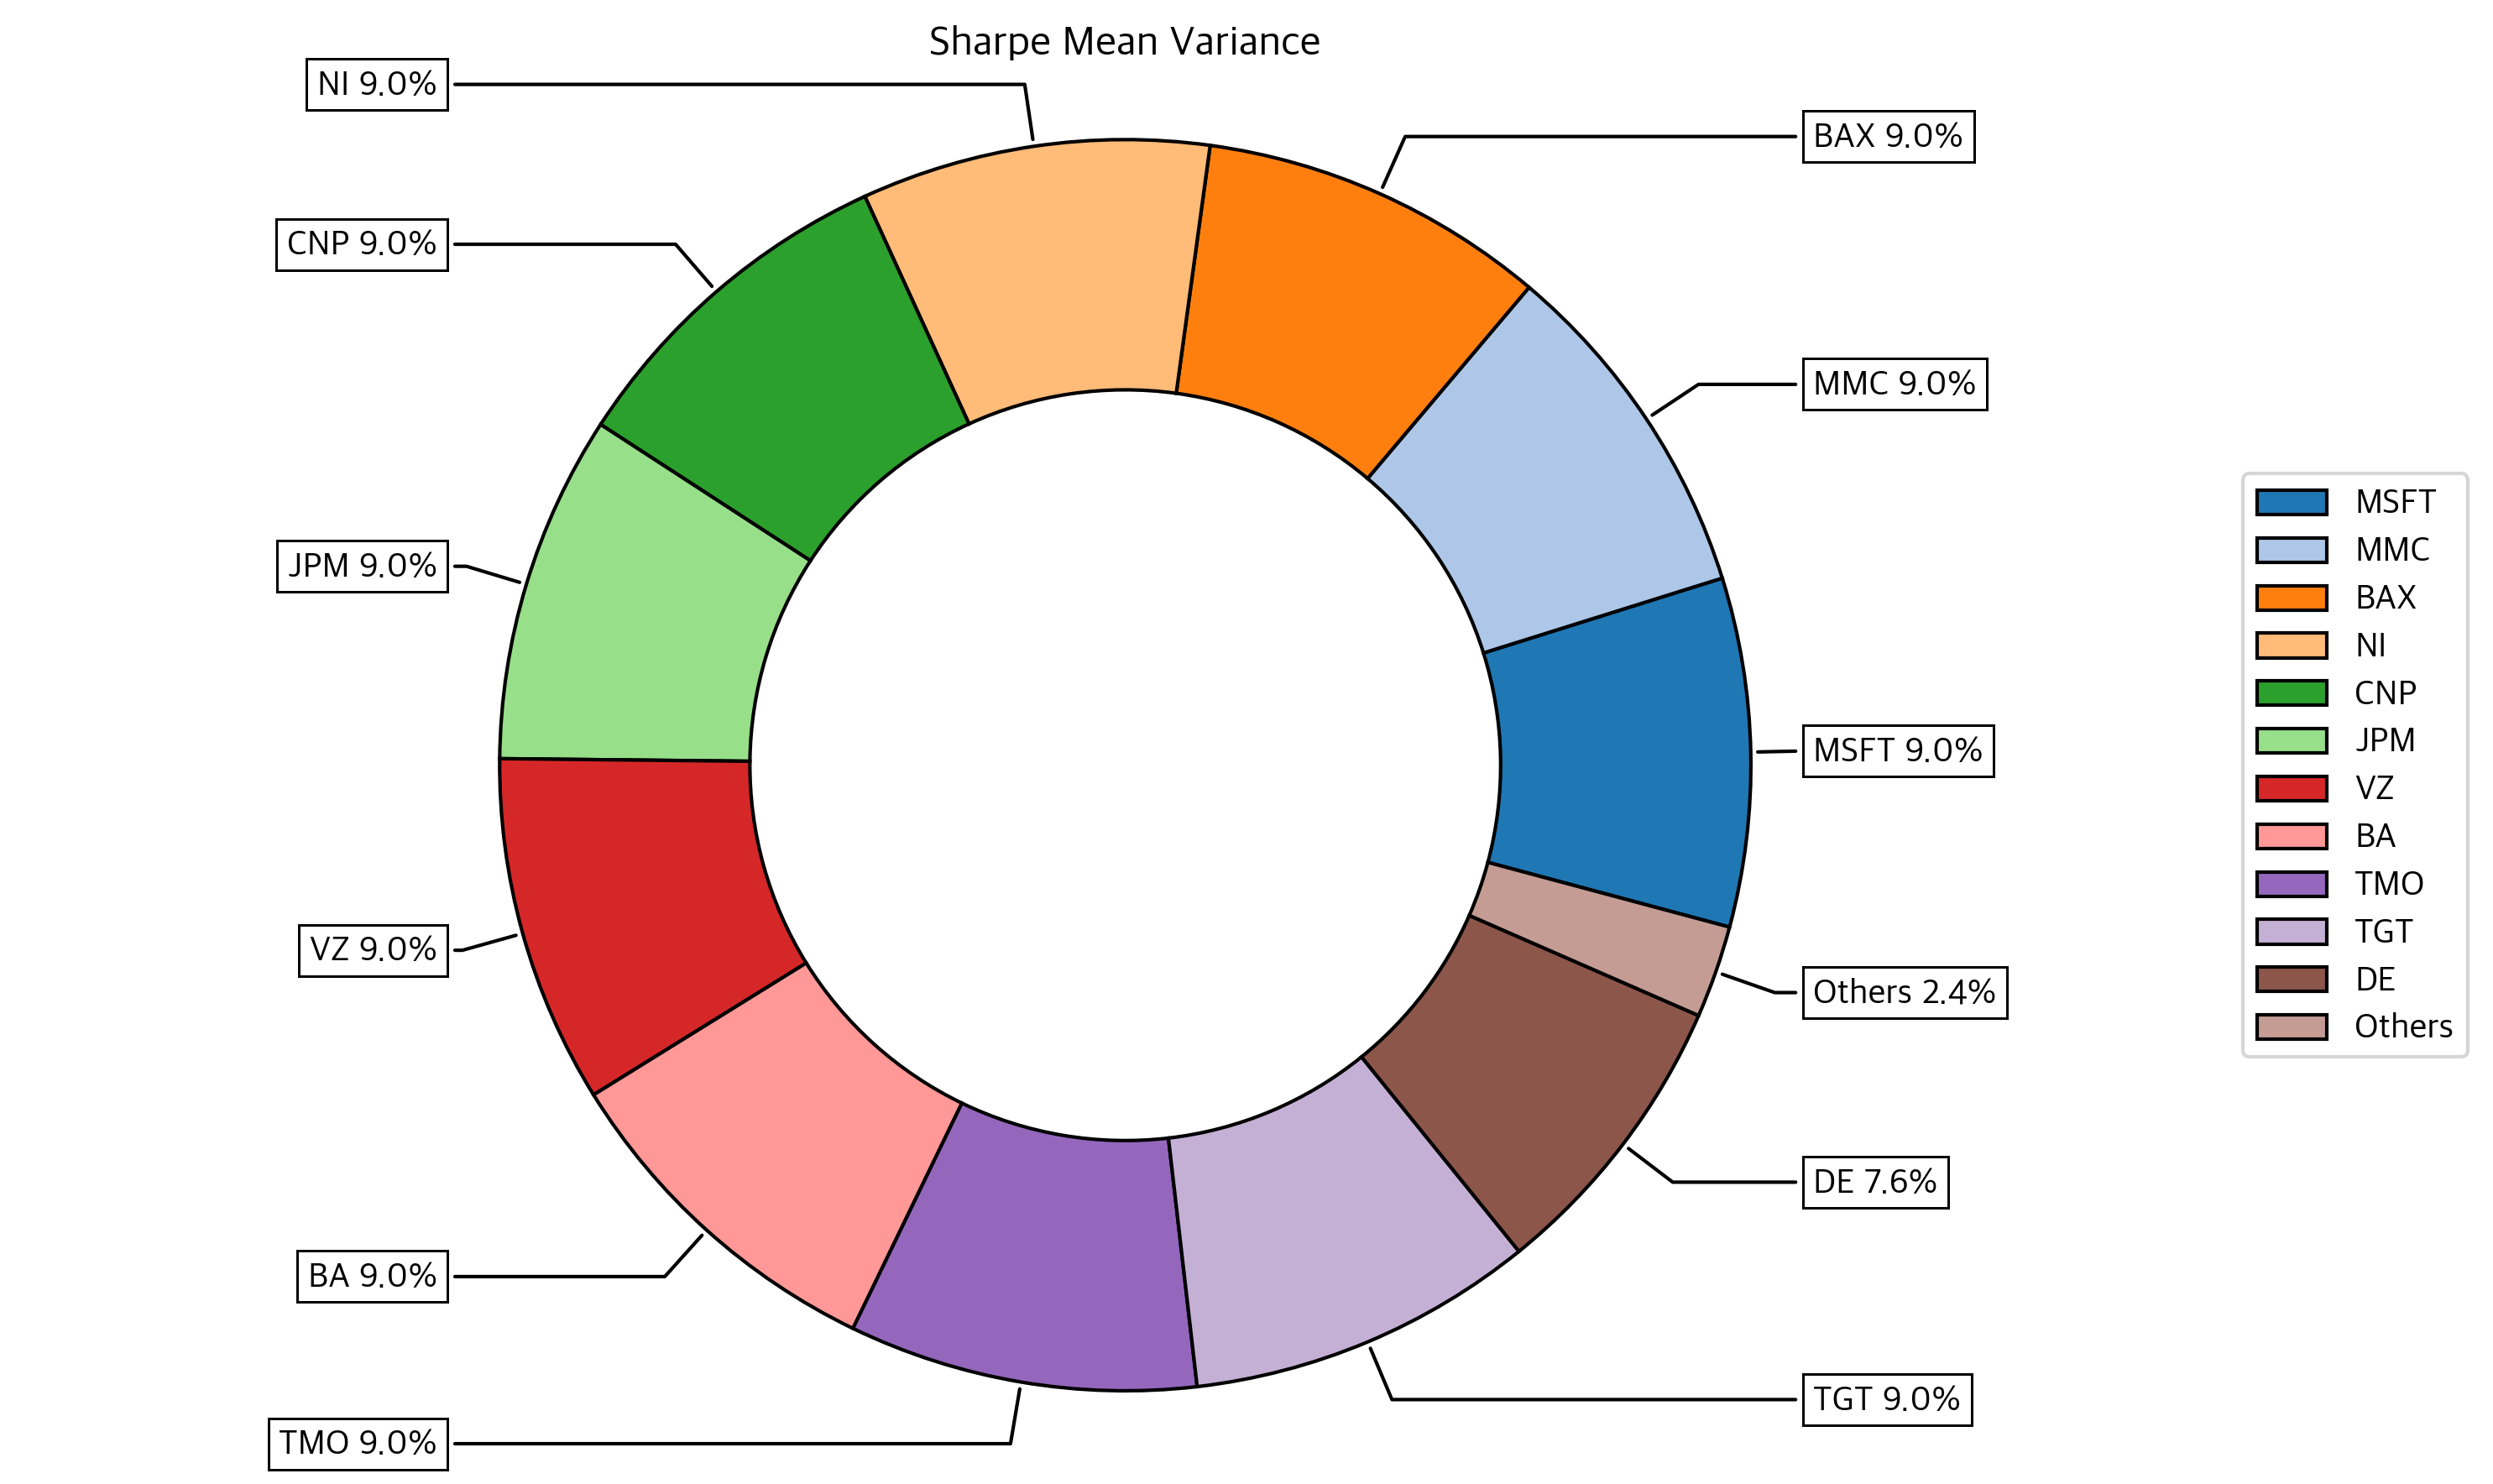

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [5]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,7.1455%,5.1959%,2.9957%,9.0000%,4.8067%,0.0000%,0.0000%,3.6000%,...,9.0000%,0.0000%,9.0000%,0.8783%,7.1233%,4.5277%,0.0000%,0.0000%,9.0000%,0.0000%
1,0.0000%,1.5716%,9.0000%,2.7140%,2.9616%,9.0000%,3.9424%,1.2549%,0.0000%,2.4742%,...,9.0000%,0.0000%,9.0000%,0.0000%,7.0020%,5.4291%,0.7294%,0.0000%,9.0000%,0.0000%
2,0.0000%,2.1993%,9.0000%,1.6490%,2.8717%,9.0000%,3.5800%,1.7926%,0.0000%,2.0297%,...,9.0000%,0.0000%,9.0000%,0.0000%,7.0526%,5.7959%,1.4383%,0.0000%,9.0000%,0.0000%
3,0.0000%,2.6831%,9.0000%,0.8216%,2.7983%,9.0000%,3.2966%,2.2085%,0.0000%,1.6811%,...,9.0000%,0.0000%,9.0000%,0.0000%,7.0870%,6.0792%,1.9854%,0.0000%,9.0000%,0.0000%
4,0.0000%,3.0546%,9.0000%,0.0565%,2.6479%,9.0000%,2.9969%,2.5506%,0.0000%,1.2876%,...,9.0000%,0.0000%,9.0000%,0.0000%,7.0685%,6.3143%,2.4213%,0.0000%,9.0000%,0.0000%


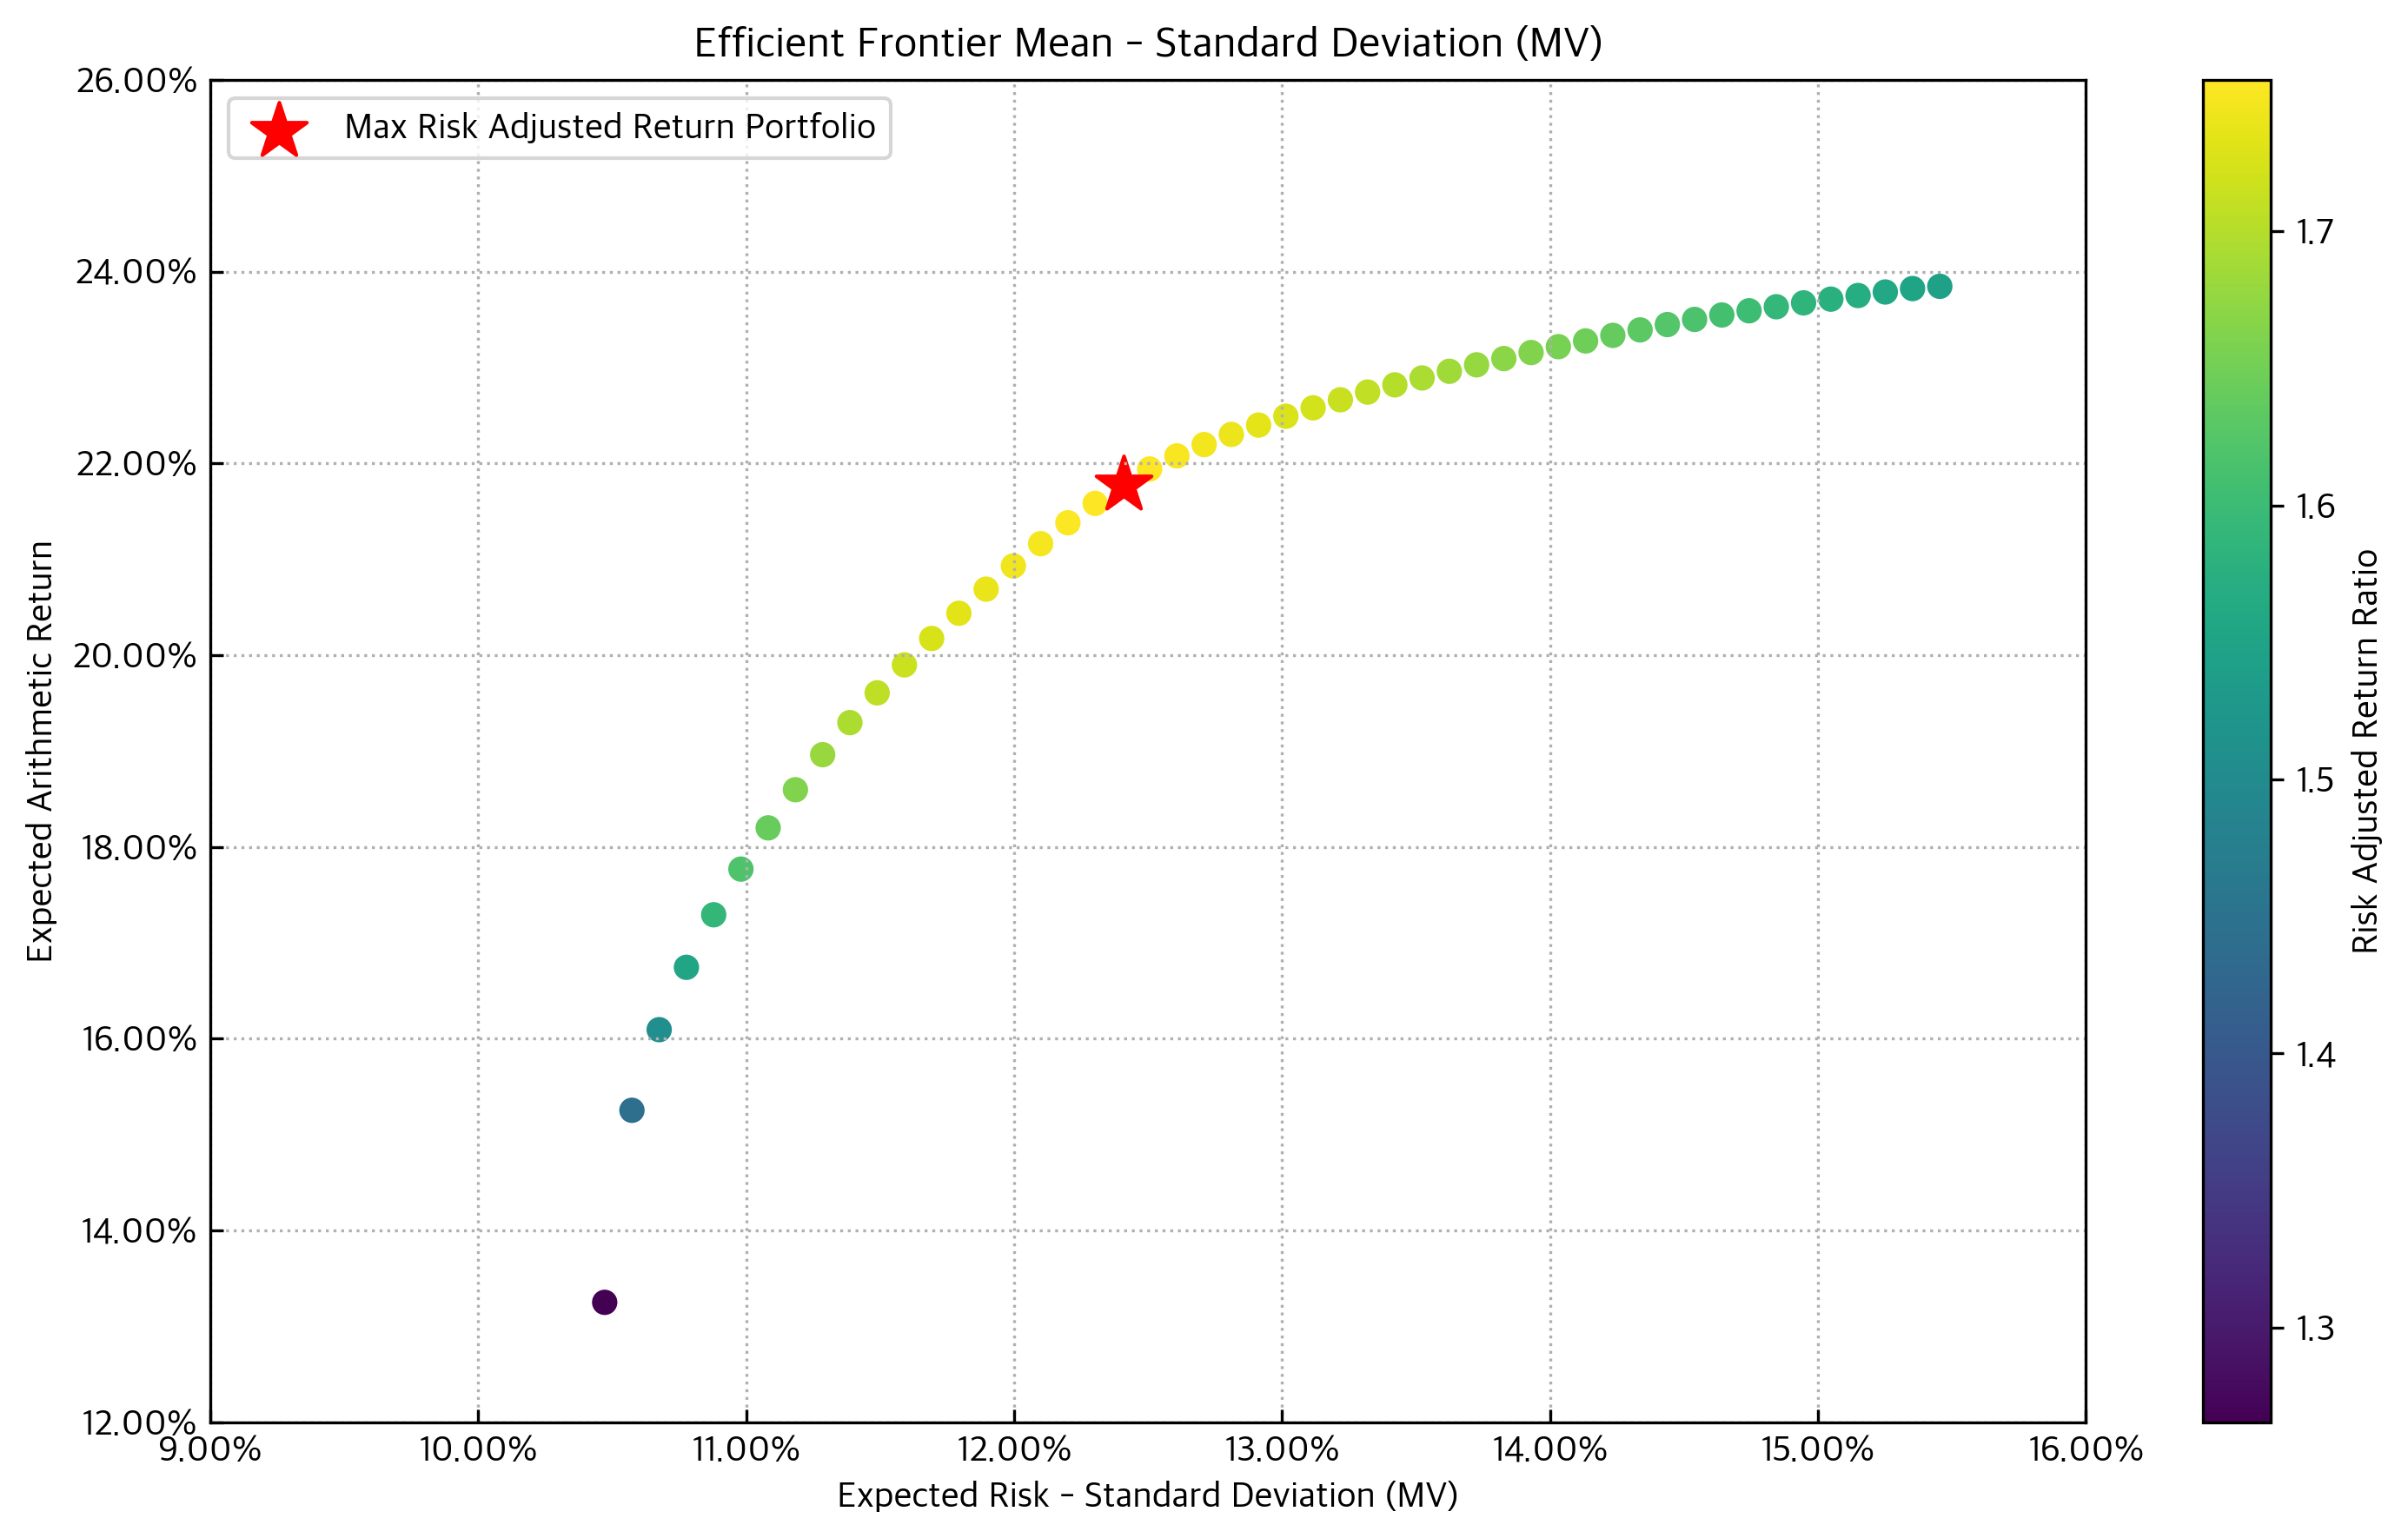

In [6]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

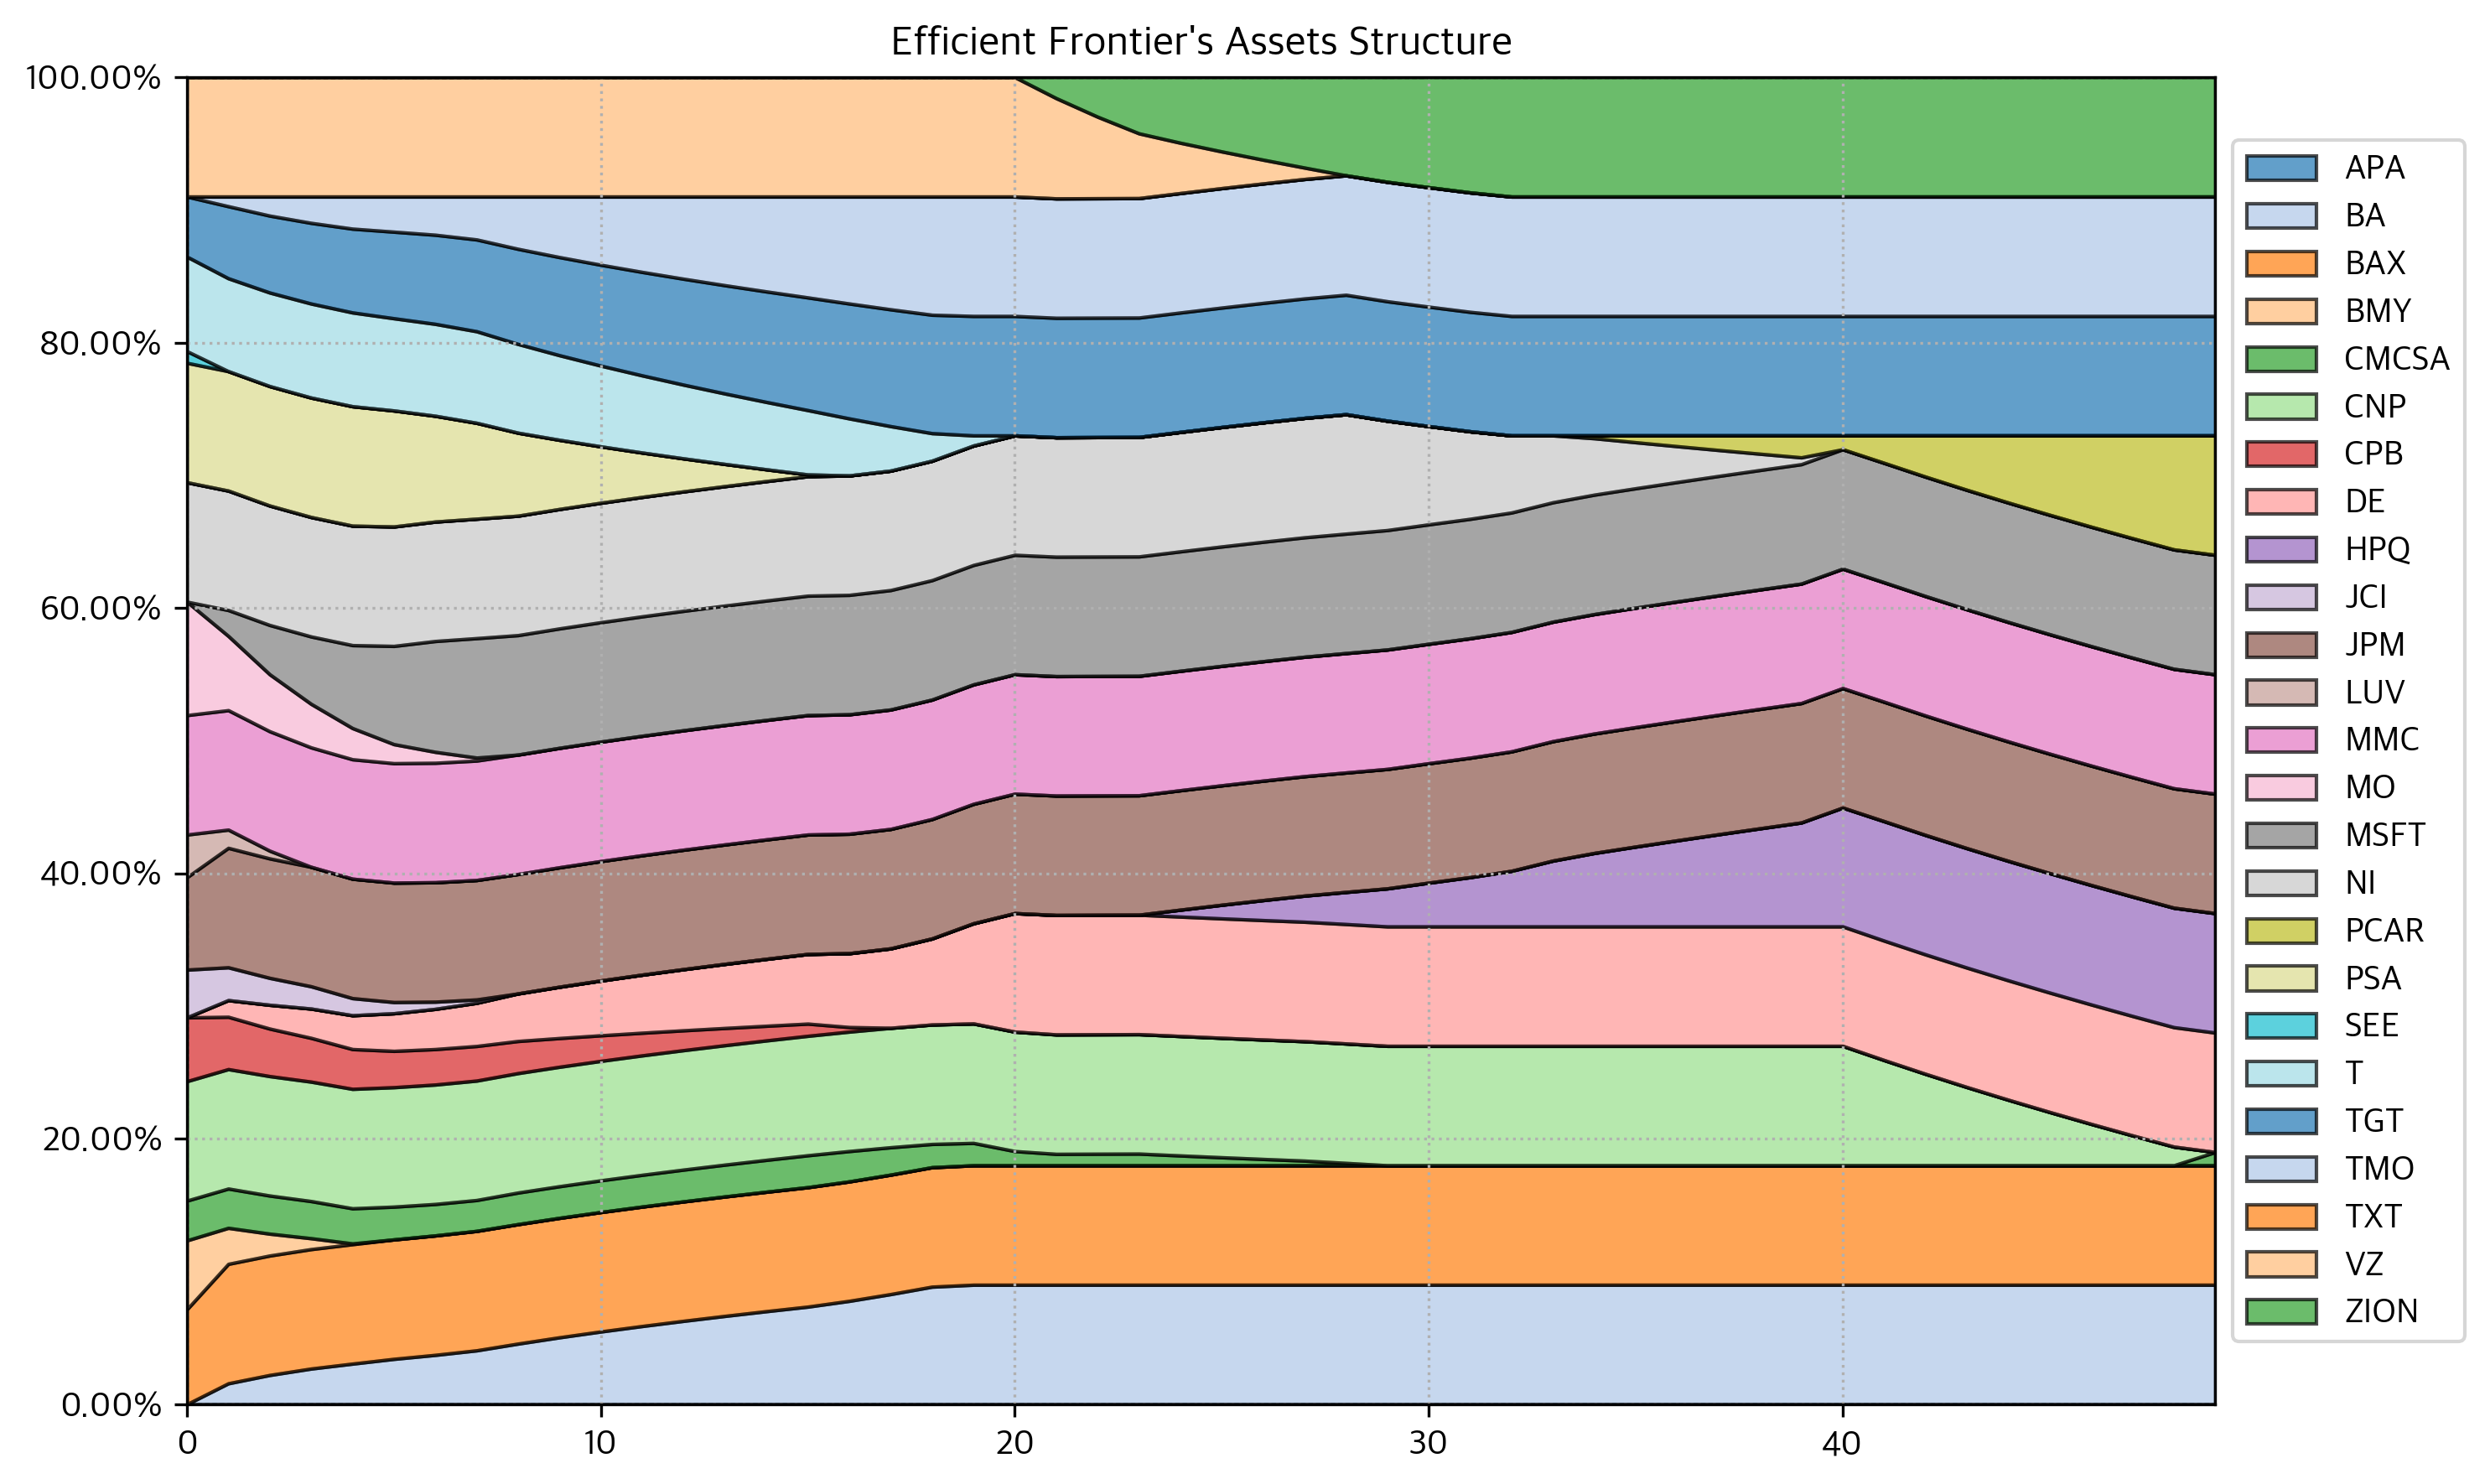

In [7]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Mean Variance Portfolios with Tracking Error Constraints

Tracking Error는 포트폴리오의 수익률이 벤치마크 수익률과 얼마나 일치하는지를 측정하는 지표로, 벤치마크 대비 포트폴리오의 성과를 평가할 때 사용됩니다.

### 3.1 Calculating the portfolio that maximizes Sharpe ratio.

In [8]:
	
# Building the portfolio object

port = rp.Portfolio(returns=Y[assets])
# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Create Tracking Error Constraints

port.kindbench = False # True if you have benchmark weights, False if you have an index  설정: 벤치마크가 특정 가중치를 가지는지(False) 또는 지수 수익률인지(True)를 설정합니다.
port.benchindex = Y[market_index] # Index Returns 설정: 벤치마크로 사용할 지수 수익률을 설정합니다. S&P 500 지수
port.allowTE = True # Allows to use Tracking Error Constraints Tracking Error 제약 조건을 사용할 수 있게 설정합니다.
port.TE = 0.008 # Maximum Tracking Error respect to benchmark returns 최대 Tracking Error를 0.8%로 설정합니다. 이는 포트폴리오 수익률이 벤치마크 수익률과 최대 0.8%의 차이를 가질 수 있도록 제약을 설정합니다.

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = "Sharpe" # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1592%,11.5019%,0.0000%,0.0000%,8.4812%,0.0000%,3.8193%,0.0000%,0.0000%,...,10.8270%,0.0000%,0.0000%,0.0000%,0.0000%,7.1806%,0.0000%,0.0000%,4.2738%,0.0000%




### Tracking Error란?

Tracking Error는 포트폴리오의 수익률이 벤치마크 수익률과 얼마나 일치하는지를 나타내는 지표로, 다음과 같은 공식을 사용합니다:
$$ \text{Tracking Error} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_{p,i} - r_{b,i})^2} $$
여기서:
- $ r_{p,i} $: 포트폴리오의 i번째 기간 수익률
- $ r_{b,i} $: 벤치마크의 i번째 기간 수익률
- $ n $: 총 기간 수

Tracking Error는 포트폴리오가 벤치마크를 얼마나 잘 추적하는지 나타내며, 값이 낮을수록 포트폴리오 수익률이 벤치마크 수익률과 더 유사합니다. 높은 Tracking Error는 포트폴리오 수익률이 벤치마크와 크게 다를 수 있음을 의미합니다.

### 요약

- **포트폴리오 객체 생성**: 주어진 자산의 수익률 데이터를 사용하여 포트폴리오 객체를 생성합니다.
- **자산 통계량 계산**: 역사적 데이터를 사용하여 기대 수익률과 공분산 행렬을 추정합니다.
- **Tracking Error 제약 조건 설정**: 포트폴리오 수익률이 벤치마크 수익률과 최대 0.8%의 차이를 가질 수 있도록 제약을 설정합니다.
- **최적 포트폴리오 추정**: 설정된 모델과 리스크 측정 방법을 사용하여 최적의 포트폴리오 가중치를 계산합니다.
- **최적 포트폴리오 가중치 출력**: 계산된 최적 포트폴리오 가중치를 출력합니다.

이 과정을 통해 Tracking Error 제약 조건을 반영한 최적의 포트폴리오를 구성할 수 있습니다. 이를 통해 포트폴리오의 성과를 벤치마크와 비교하여 관리할 수 있습니다.

### 3.2 Plotting portfolio composition

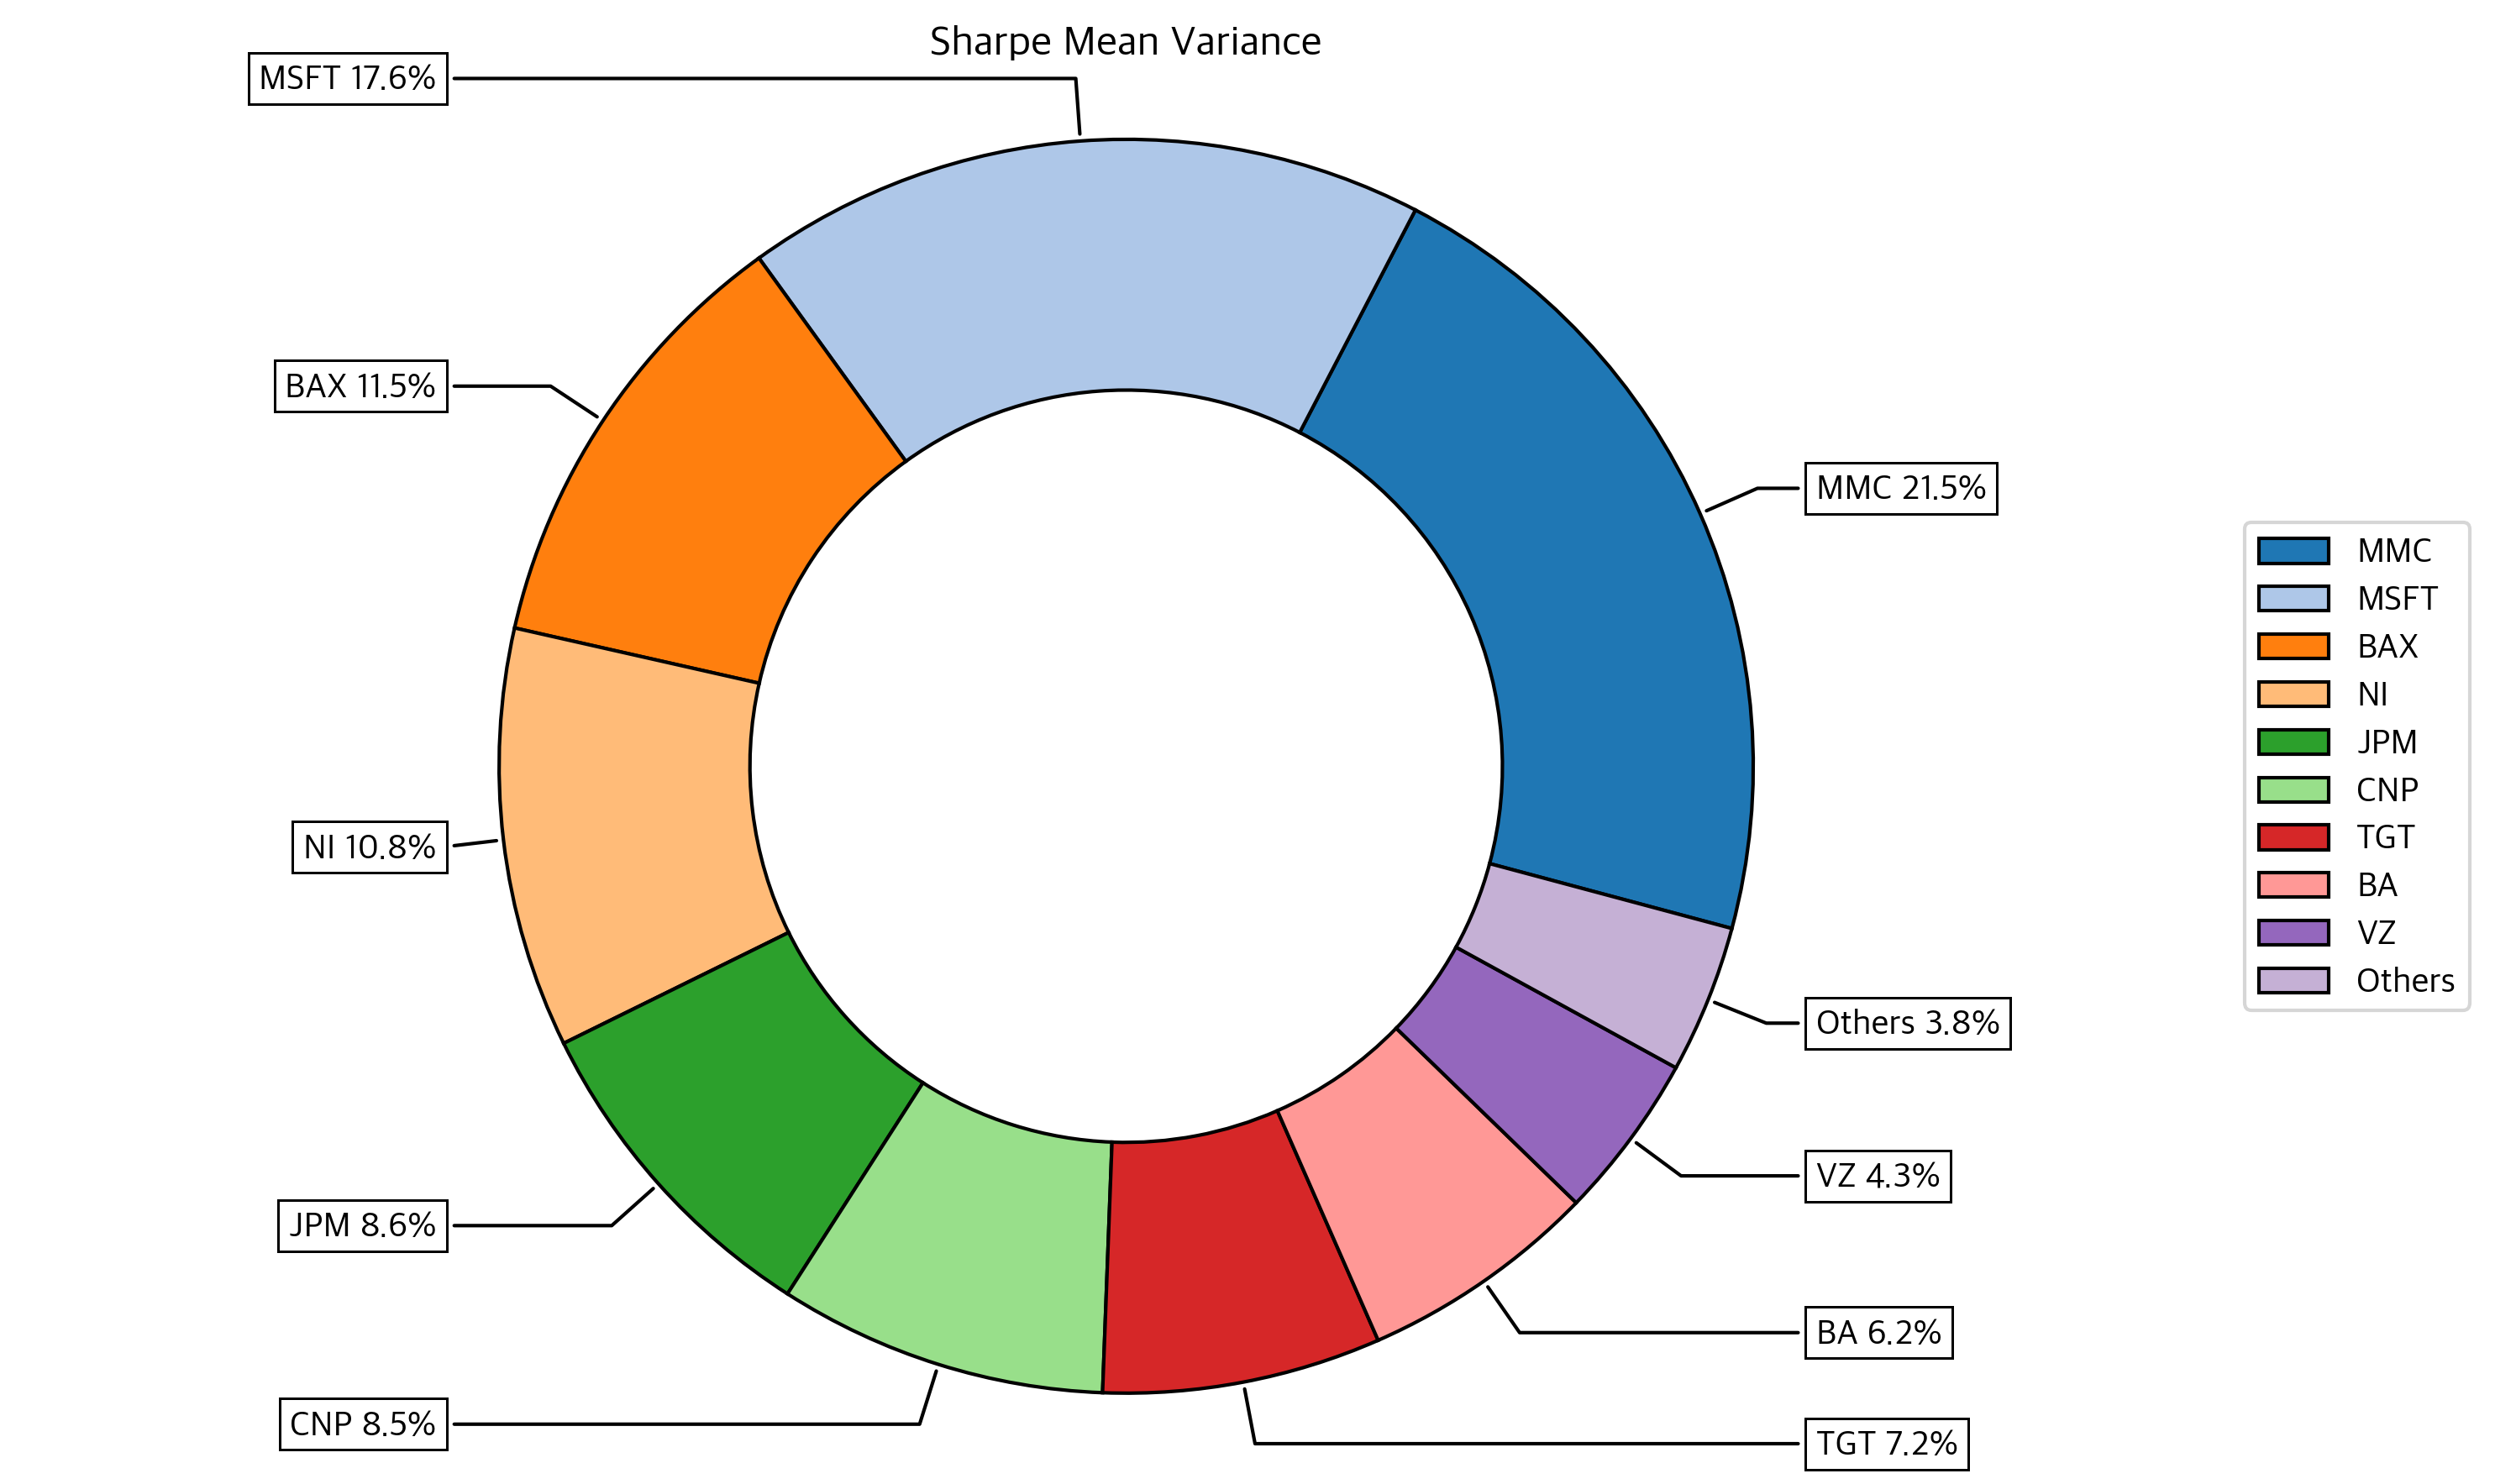

In [9]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier

In [10]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2377%,4.3880%,2.1297%,6.9906%,3.2270%,0.0742%,0.0000%,2.8447%,...,11.4530%,0.0000%,14.9248%,0.1682%,6.5903%,4.0899%,0.0000%,0.0000%,8.2765%,0.0000%
1,0.0000%,1.9191%,8.3807%,0.9695%,1.7254%,8.4905%,2.1986%,1.3124%,0.0000%,1.1317%,...,13.3629%,0.0000%,9.4848%,0.0000%,5.6184%,5.4614%,0.0005%,0.0000%,8.7363%,0.0000%
2,0.0000%,2.6771%,9.2350%,0.0000%,1.3021%,9.0507%,1.7898%,1.6796%,0.0000%,0.2859%,...,14.0928%,0.0000%,7.0161%,0.0000%,5.2127%,5.9642%,0.0002%,0.0000%,8.9555%,0.0000%
3,0.0000%,3.2657%,9.7847%,0.0000%,0.7564%,9.4503%,1.3036%,1.8822%,0.0000%,0.0000%,...,14.6530%,0.0000%,4.5053%,0.0000%,4.5556%,6.3314%,0.0000%,0.0000%,9.1928%,0.0000%
4,0.0000%,3.7488%,10.2198%,0.0000%,0.1935%,9.7675%,0.6483%,2.0250%,0.0000%,0.0000%,...,15.0006%,0.0000%,2.0338%,0.0000%,3.6868%,6.6063%,0.0000%,0.0000%,9.2556%,0.0000%


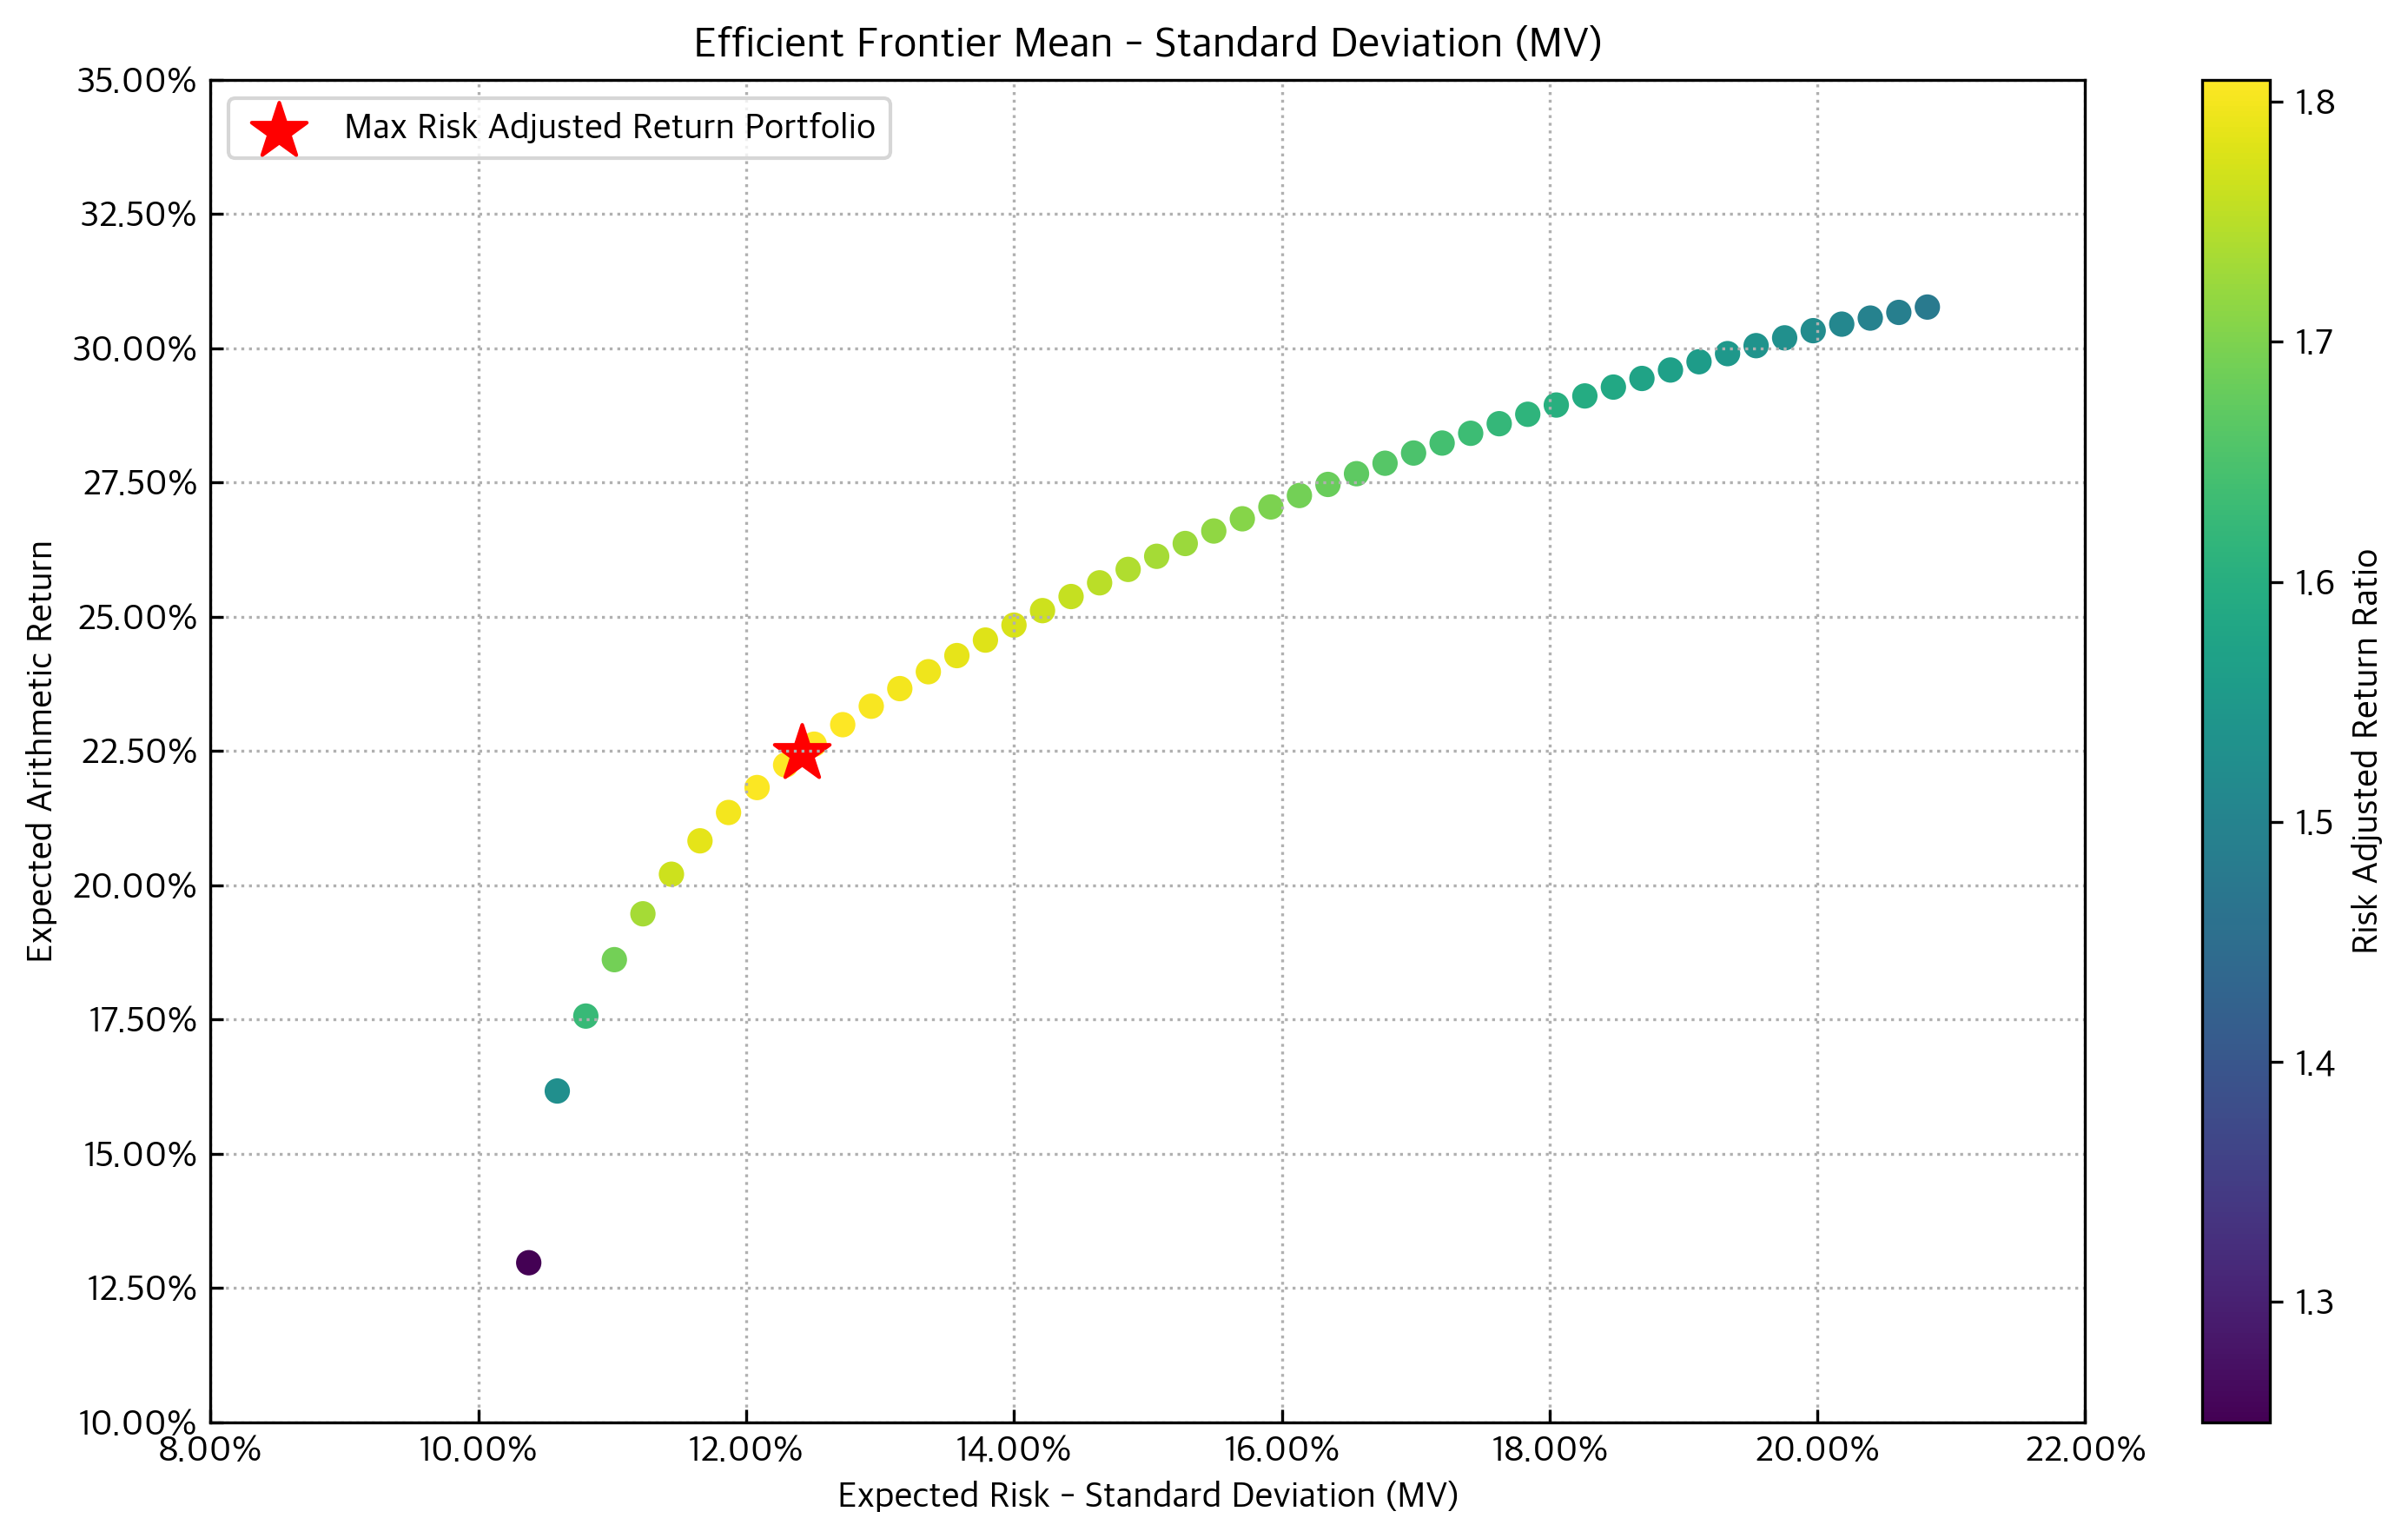

In [11]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

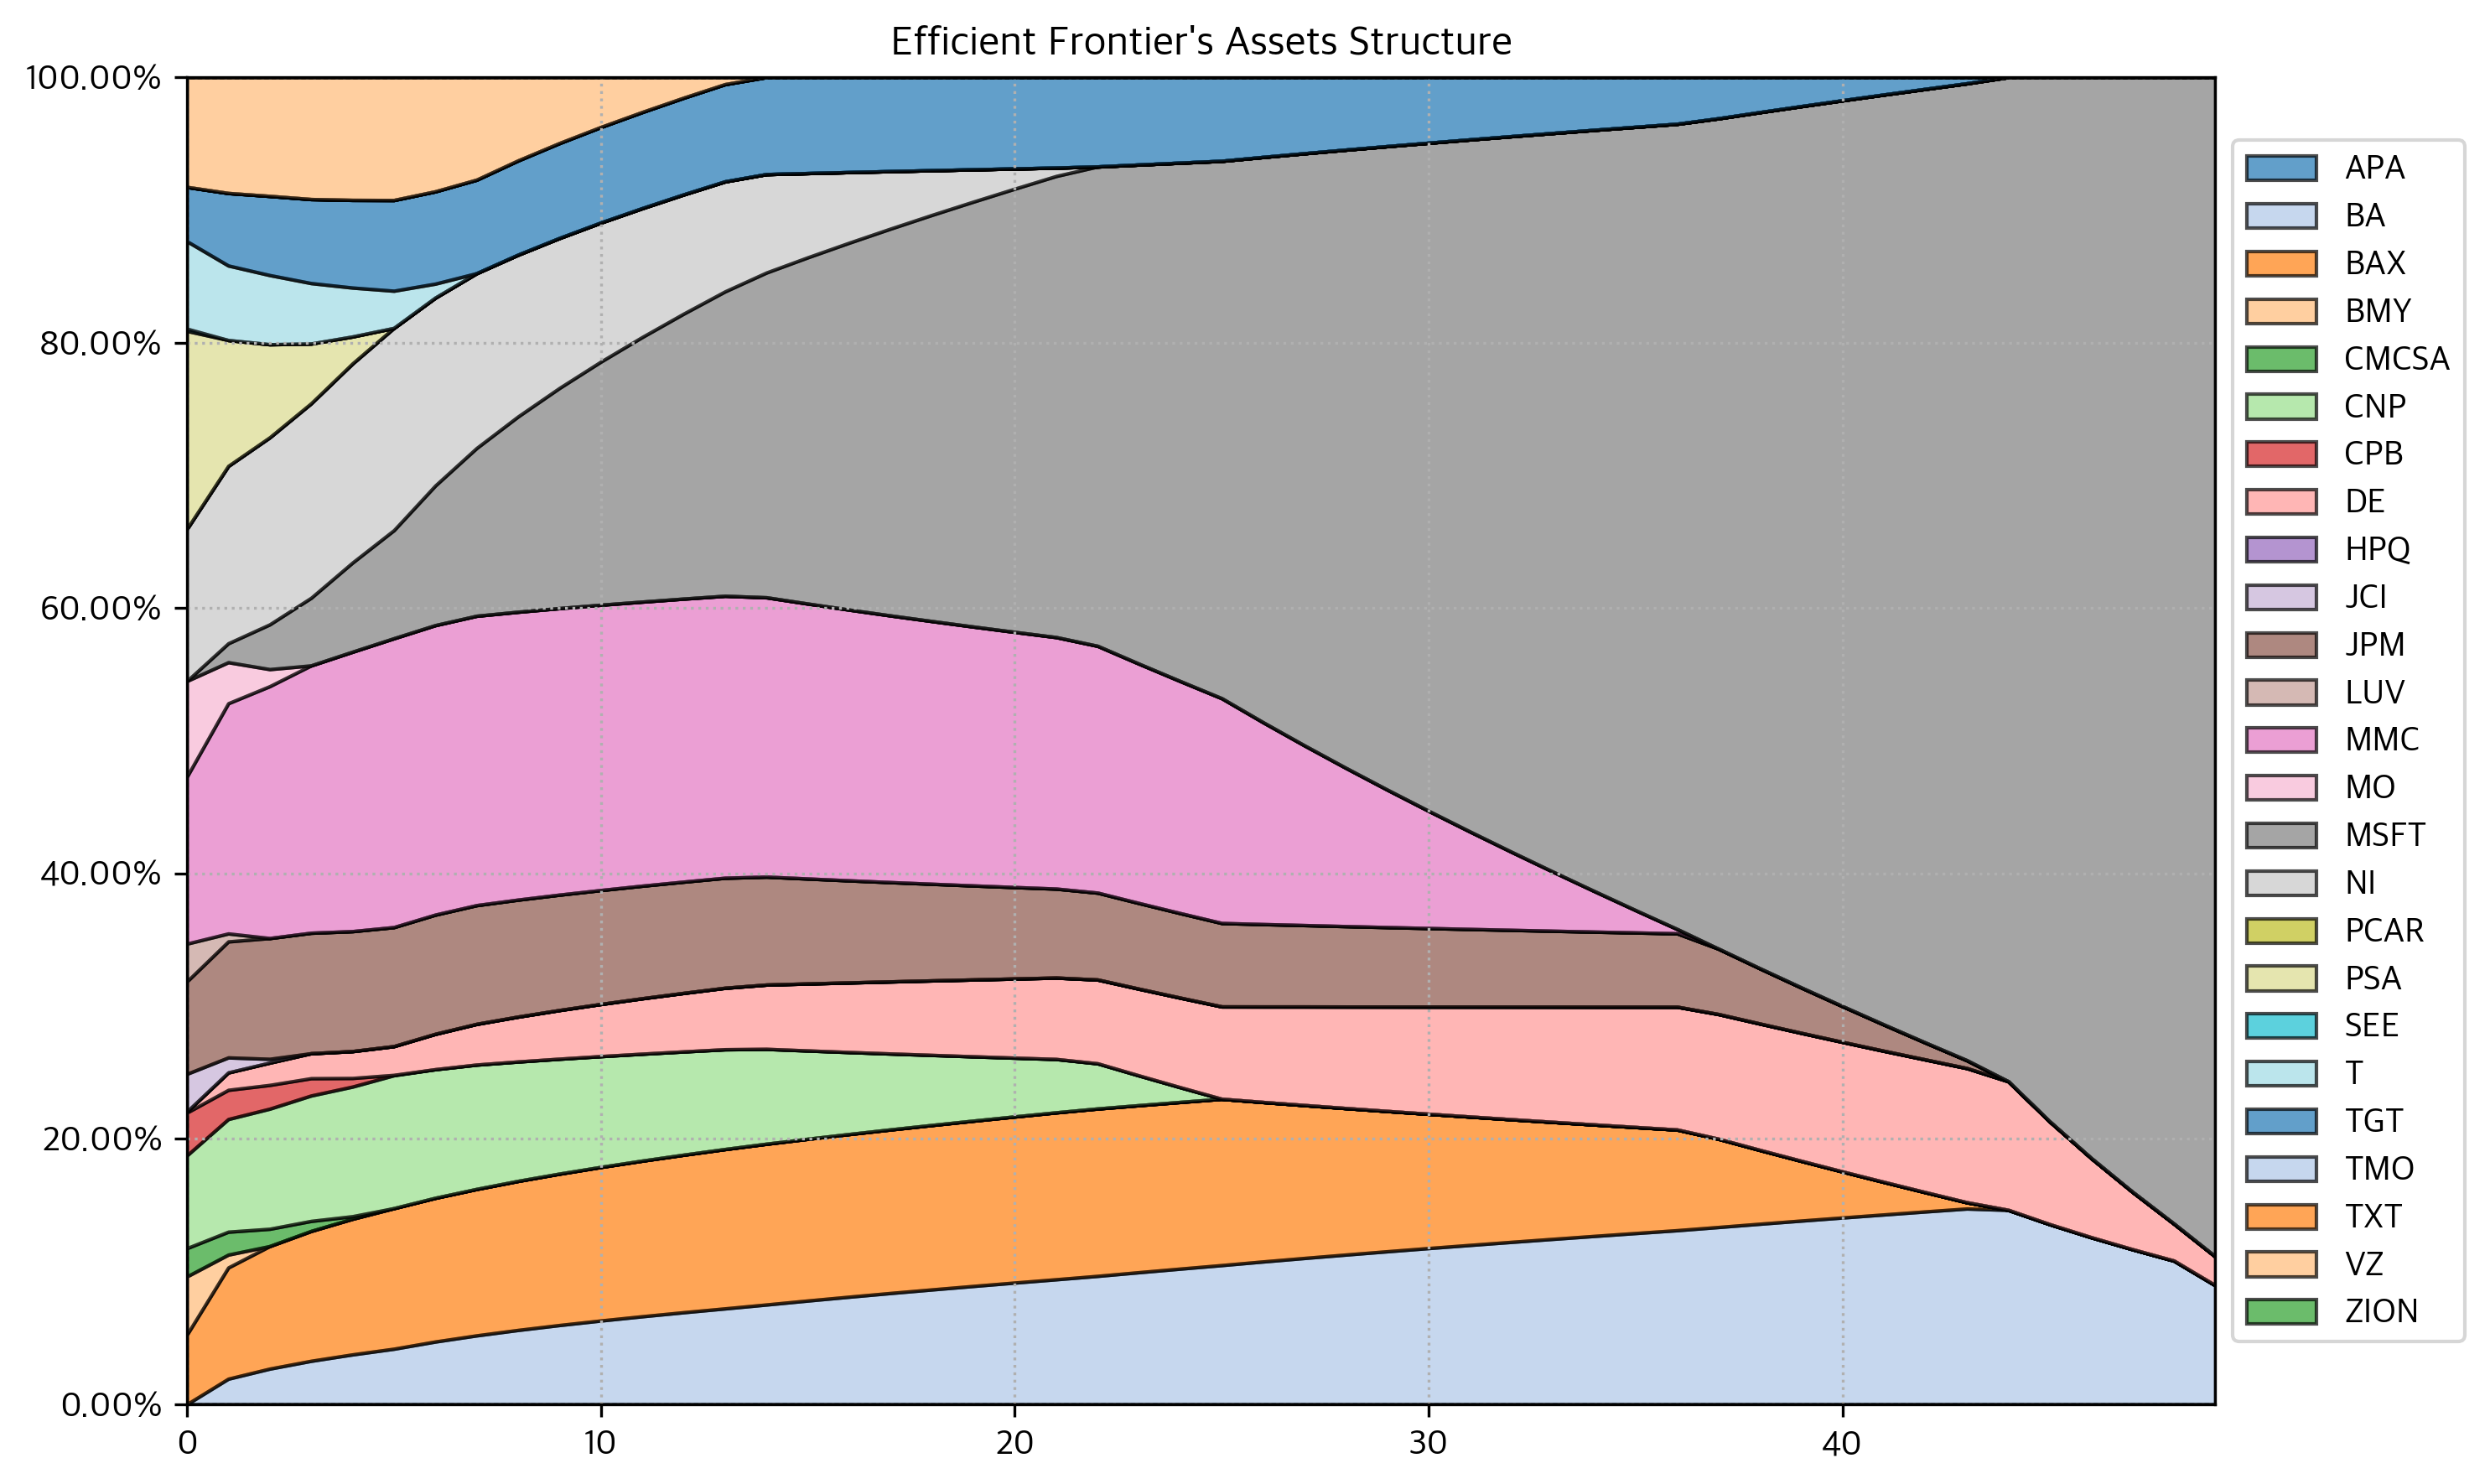

In [12]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Mean Risk Portfolios with Tracking Error Constraints

 여러 리스크 측정 방법을 사용하여 인덱스를 기준으로 한 트래킹 에러 제약 조건을 적용한 최적의 포트폴리오를 계산할 것입니다. 먼저, CVaR(조건부 가치 위험)을 리스크 측정 방법으로 사용할 때 리스크 조정 수익률을 최대화하는 포트폴리오를 계산한 후, 사용 가능한 모든 리스크 측정 방법에 대해 리스크 조정 수익률을 최대화하는 포트폴리오를 계산할 것입니다.

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

In [13]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,12.3494%,0.0000%,0.0000%,7.4900%,0.0000%,5.1439%,0.0000%,0.0000%,...,12.6863%,0.0000%,0.0000%,0.0000%,0.0000%,11.1966%,0.0000%,0.0000%,3.6764%,0.0000%


### 3.2 Plotting portfolio composition

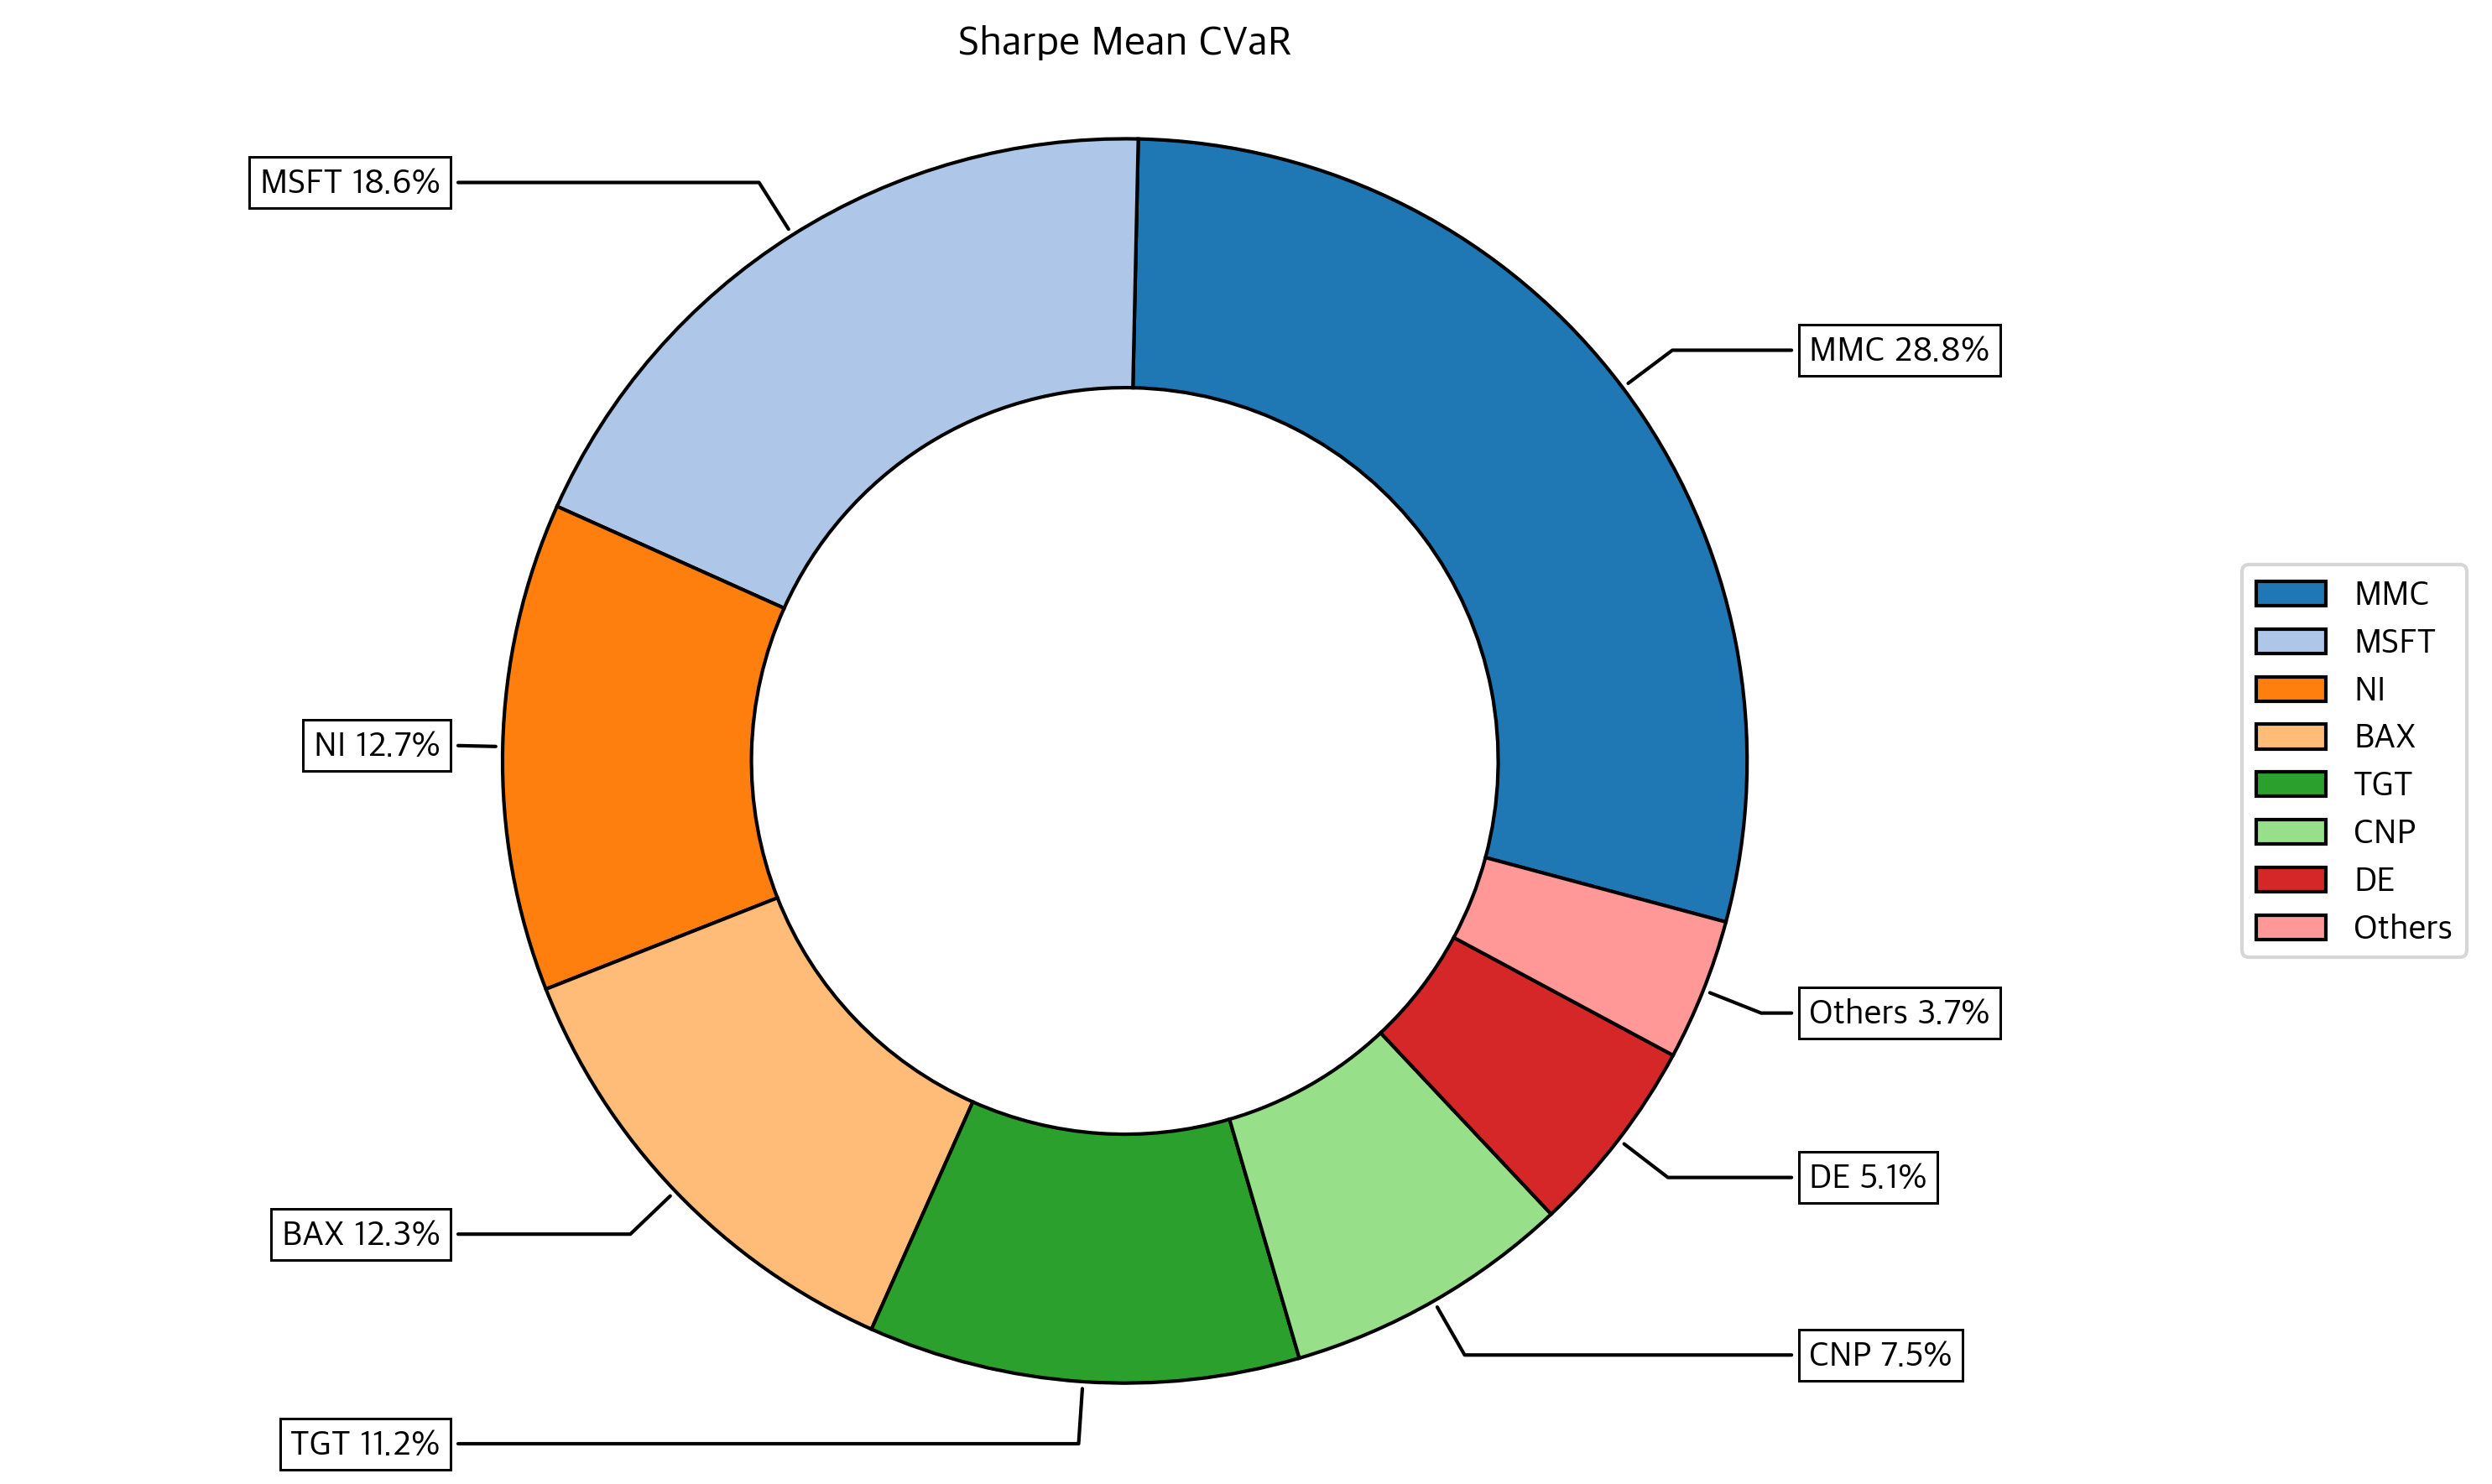

In [14]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier

In [15]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,2.1561%,7.0922%,0.1946%,1.8686%,7.9951%,0.0000%,0.0000%,4.0582%,...,6.9445%,0.0000%,20.6090%,0.0000%,3.0305%,4.1820%,0.0000%,0.0000%,20.4704%,0.0000%
1,0.0000%,0.0000%,4.5137%,5.5283%,0.0000%,5.3479%,5.0616%,0.0000%,0.0000%,1.7812%,...,7.6087%,0.0000%,14.8370%,0.0000%,2.5566%,7.0957%,0.0000%,0.0000%,19.4609%,0.0000%
2,0.0000%,0.0000%,5.9252%,3.7533%,0.0000%,11.7830%,0.3385%,0.0000%,0.0000%,2.4528%,...,7.1083%,0.0000%,12.1718%,0.0000%,0.6116%,6.4781%,0.0000%,0.0000%,19.5105%,0.0000%
3,0.0000%,0.0000%,6.8001%,0.7126%,0.0000%,12.6032%,0.0000%,0.1840%,0.0000%,0.3736%,...,7.1733%,0.0000%,11.1833%,0.0000%,0.0000%,8.1479%,0.0000%,0.0000%,17.7098%,0.0000%
4,0.0000%,0.0000%,7.3868%,0.0000%,0.0000%,11.4160%,0.0000%,0.0258%,0.0000%,0.0000%,...,9.5895%,0.0000%,6.5085%,0.0000%,0.0000%,10.1422%,0.0000%,0.0000%,15.5278%,0.0000%


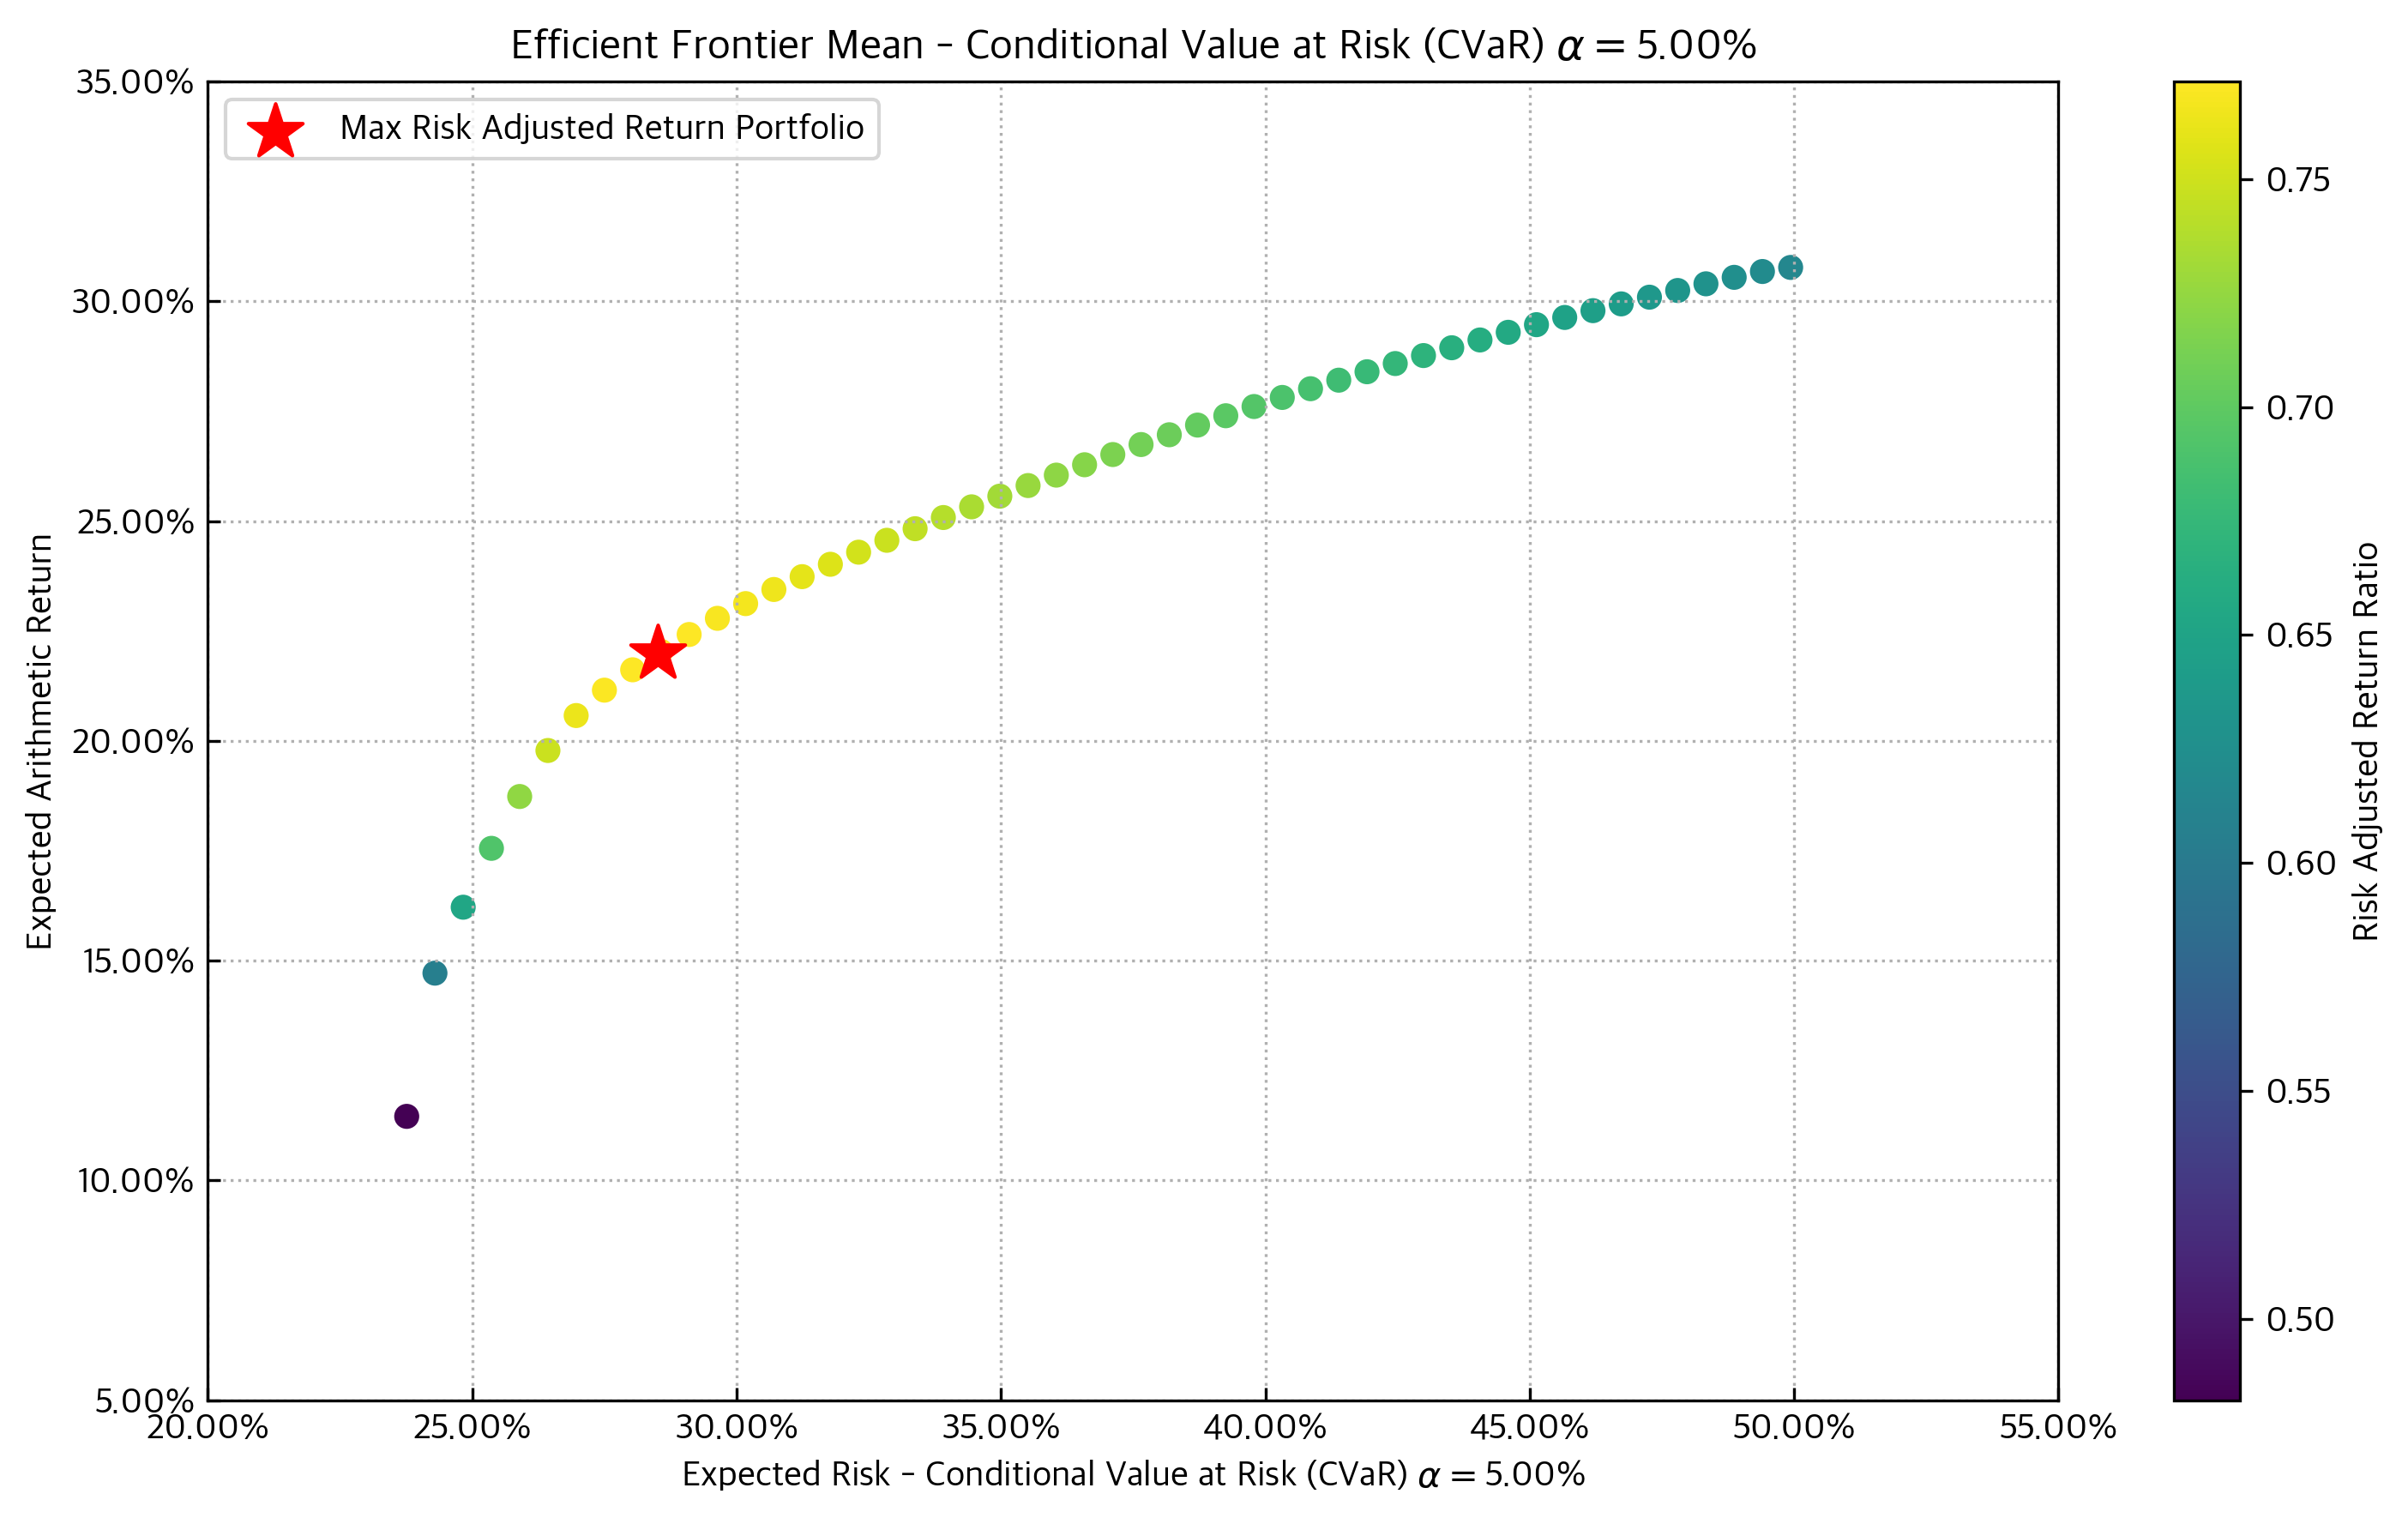

In [16]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

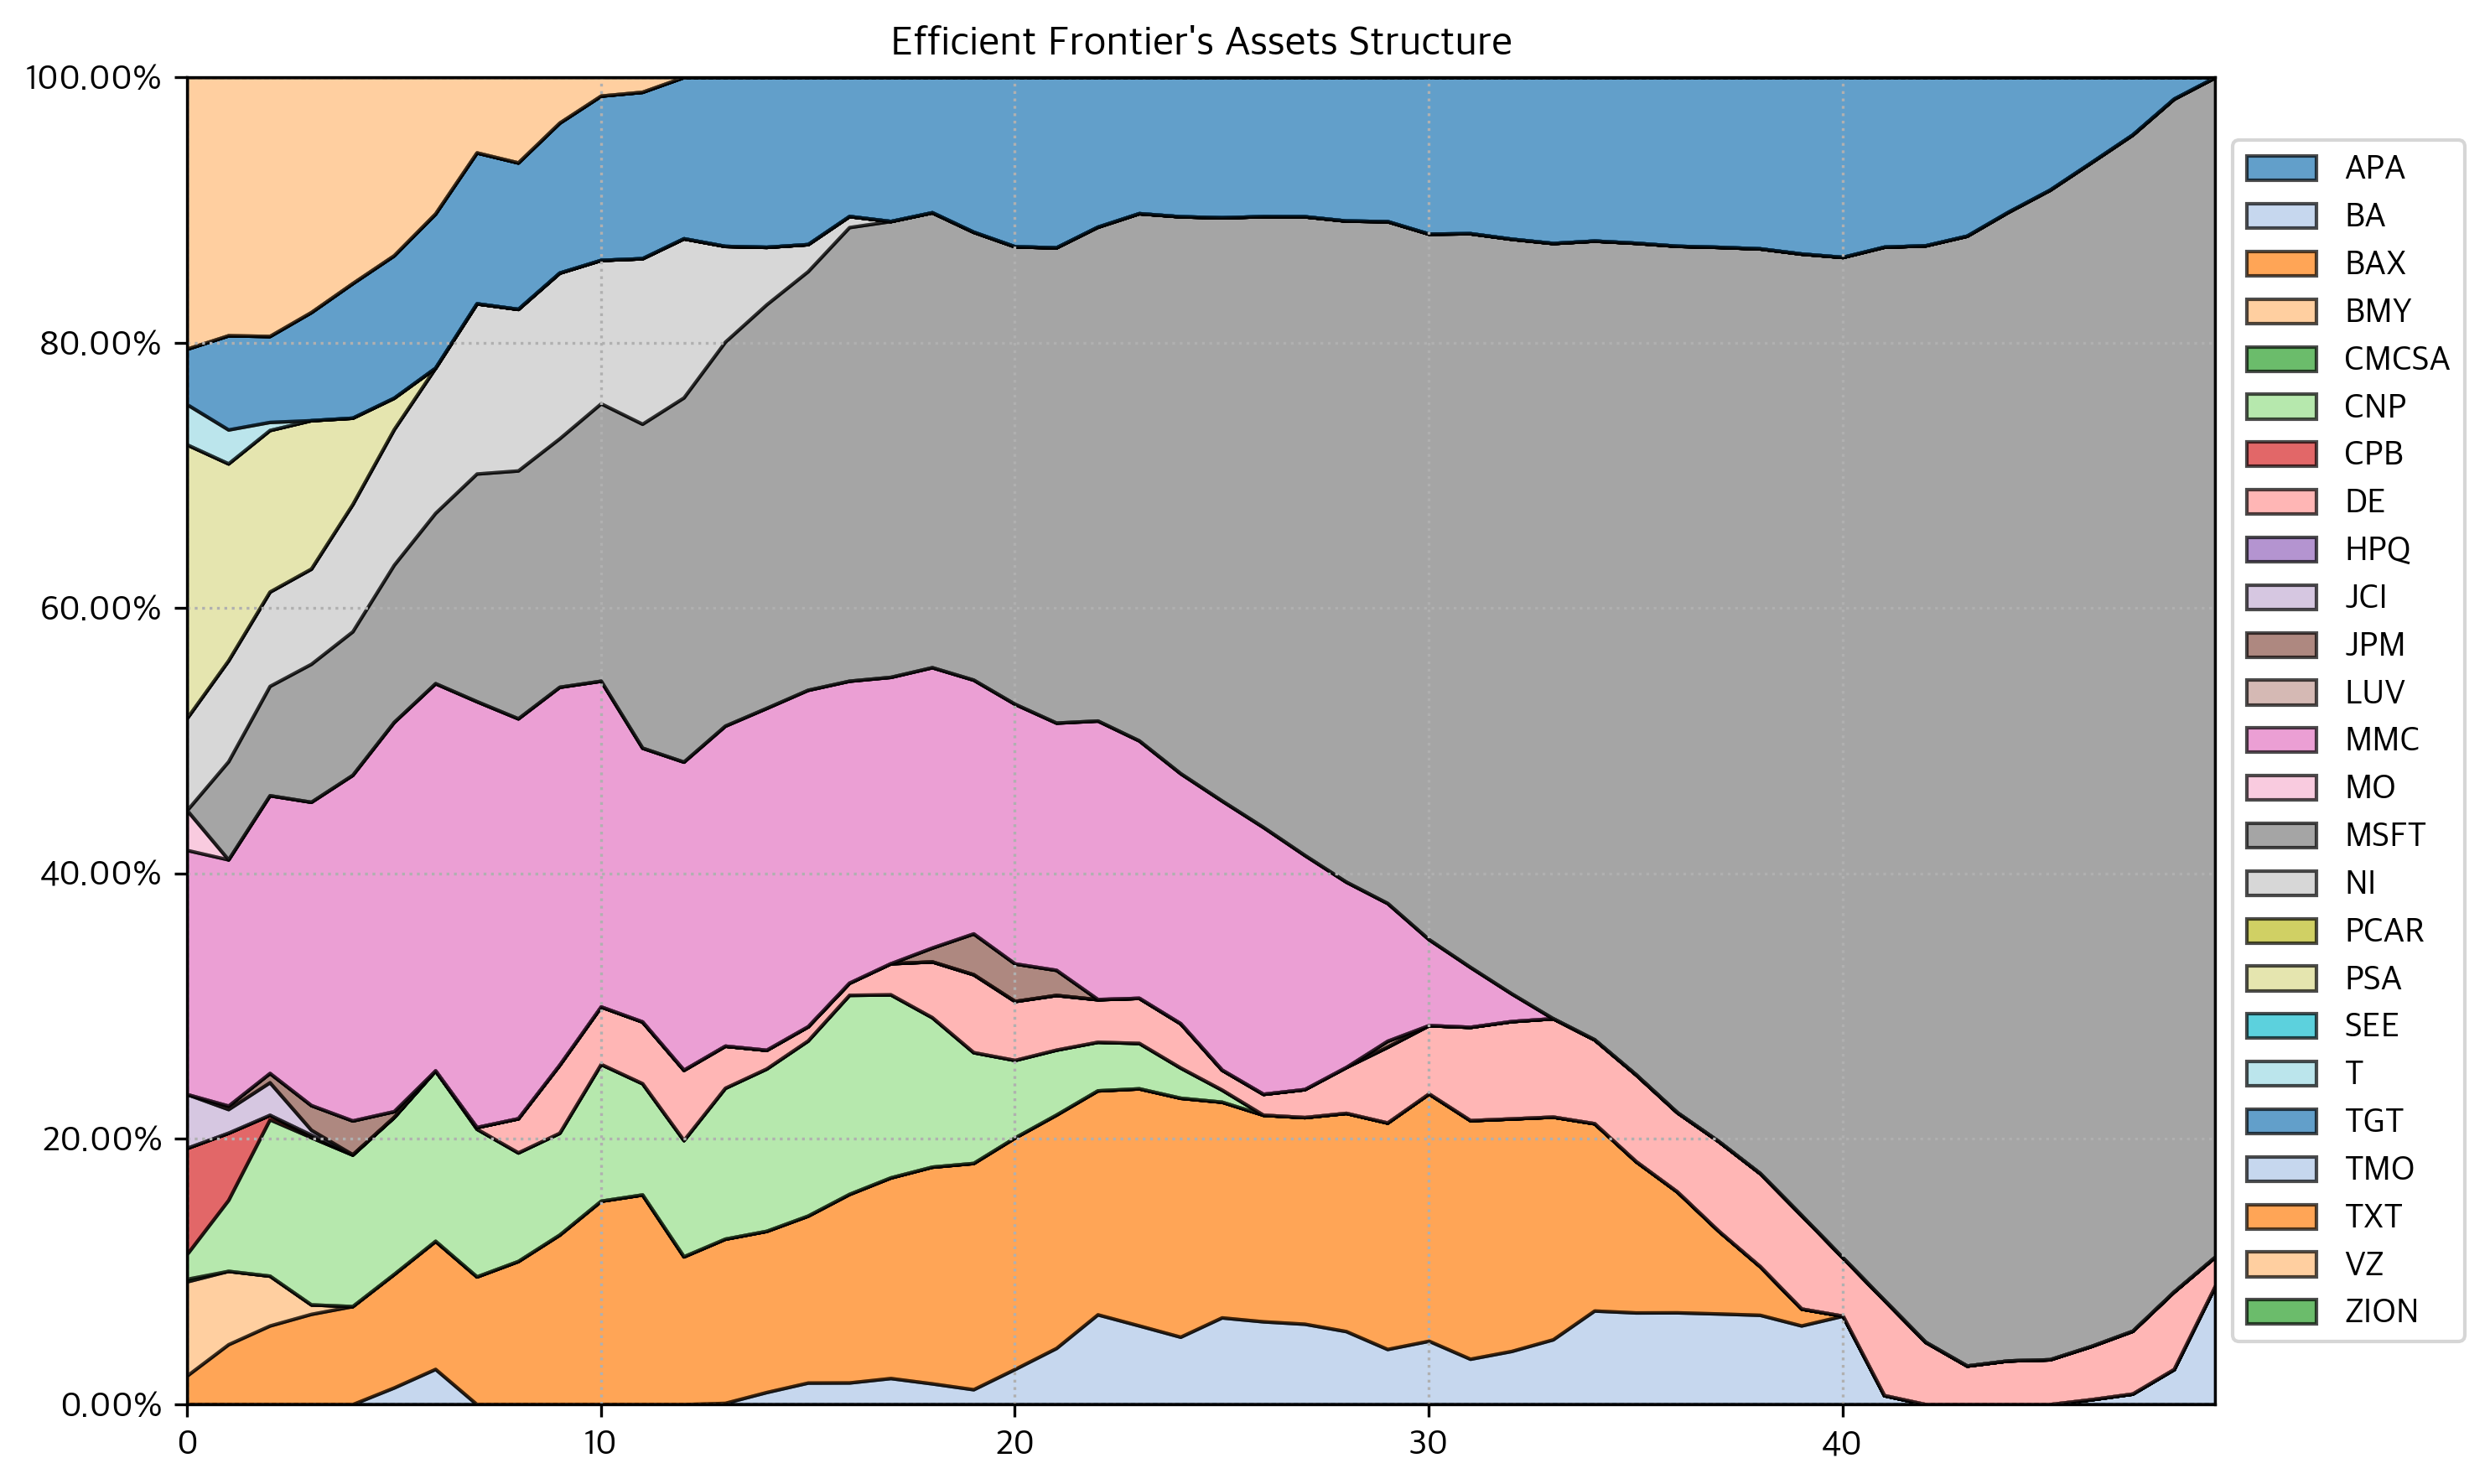

In [17]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [18]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [19]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.16%,7.63%,4.38%,6.11%,3.98%,0.00%,1.55%,0.00%,1.20%,6.79%,2.81%,6.34%,0.00%
BAX,11.50%,9.24%,10.37%,9.04%,10.62%,12.35%,4.46%,0.00%,0.00%,4.48%,0.00%,4.34%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.48%,7.21%,9.15%,5.96%,9.38%,7.49%,30.27%,28.96%,56.01%,13.49%,32.93%,18.16%,42.77%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,5.37%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.82%,2.73%,1.18%,2.33%,0.90%,5.14%,0.00%,0.00%,13.08%,1.49%,0.82%,1.01%,2.98%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

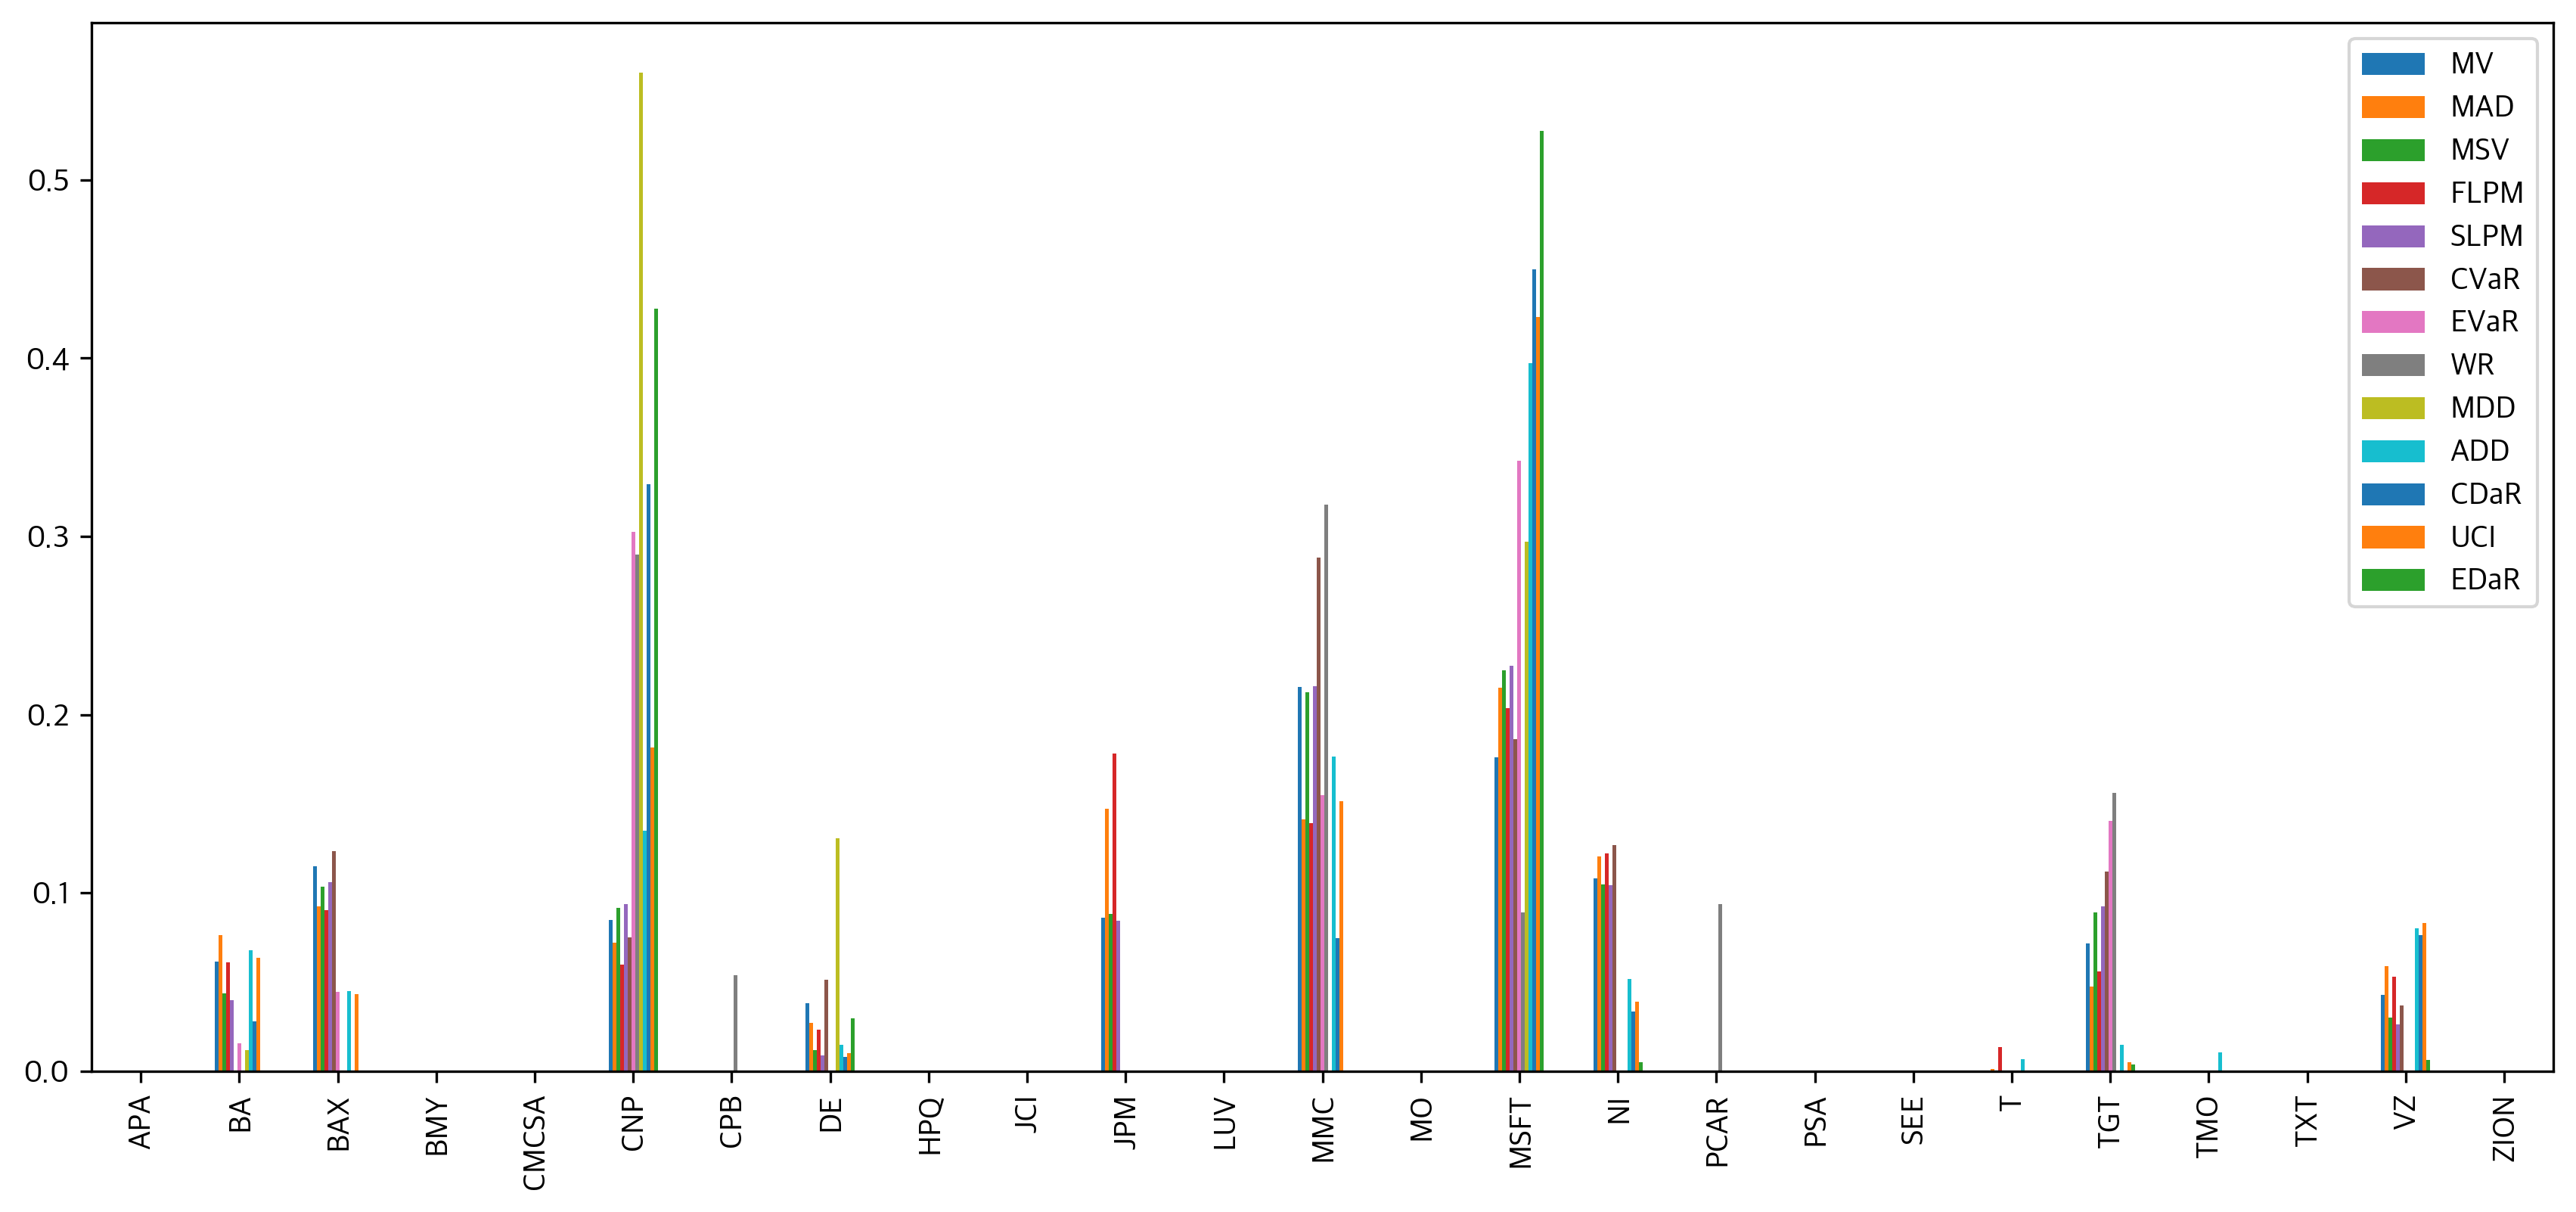

In [20]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)